### 1. the Bank_Transactions Dataset

This section contains the EDA for the `Bank_Transactions` dataset, which is the initial step of our AI assignment. The analysis includes data cleaning, handling missing values, and a variety of visualizations to uncover insights and patterns within the data. The visualizations cover distributions, correlations, and time-series analysis, which are critical to understand before applying any machine learning models.


### 1.1. Importing Libraries and Setting Up the Environment

The following code block is dedicated to importing necessary Python libraries that will be used throughout the Exploratory Data Analysis (EDA). 

- `pandas` for data manipulation and analysis.
- `os` for interacting with the operating system.
- `matplotlib.pyplot` for creating static, interactive, and animated visualizations in Python.
- `seaborn` for making attractive and informative statistical graphics.
- `datetime` for handling date and time data.

These libraries are foundational for conducting a thorough EDA and will be used for tasks ranging from data loading to visualization.


In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime  
from scipy import stats

## 1.2. Setting the Directory and Loading the Dataset

This section covers the steps to set the working directory and load the `bank_transactions.csv` file into a DataFrame for analysis.

1. `path`: Specifies the path to the directory where the dataset is located.
2. `os.chdir`: Changes the current working directory to the specified path. This makes file access easier.
3. `os.listdir`: Lists the contents of the 'bank' directory to verify the presence of the dataset file.
4. `bank_path`: Joins the directory 'bank' with the file name to create a full file path.
5. `pd.read_csv`: Reads the CSV file into a pandas DataFrame named `bank_df`.
6. Displaying the first few rows of `bank_df` with `head()` to get an initial glimpse of the data structure.

This step is crucial as it lays the foundation for the entire EDA by ensuring that the dataset is correctly loaded and ready for analysis.


In [10]:
os.getcwd()

'/Users/owenalberts/Downloads'

In [11]:
os.listdir(os.path.join('bank'))# independent of the platform (unix, windows)

['modified_bank_transactions.csv', 'bank_transactions.csv', 'India cities.csv']

In [12]:
bank_transaction_path = os.path.join("bank", "modified_bank_transactions.csv")
bank_df_Original = pd.read_csv(bank_transaction_path, sep=',')

## 2. Feature Engineering

### 2.1 Gender Encoding and Data Cleaning:

- **Gender to Numeric Conversion**: The 'CustGender' column was transformed into a numeric format to facilitate analysis, with 'M' mapped to 0, 'F' to 1, and missing or ambiguous values to 2.

- **Handling Missing Gender Values**: Missing values in 'CustGender' were filled with 2, representing unknown genders, to maintain the integrity of the dataset.

- **Age Calculation**: Customer age was derived from 'CustomerDOB'. We handled potential issues such as incorrect future dates by adjusting the year and calculating the age in years.

- **Data Integrity for Age**: Rows with improbable ages (greater than 100) were removed to preserve data quality.

### 2.2 Monetary Conversion and Missing Data Treatment:

- **Currency Conversion**: Transaction amounts were converted from INR to Euro using a specified conversion rate, adding a new 'TransactionAmount (Euro)' column to the dataset.

- **Missing Data Handling**: 
   - Missing categorical data were replaced with 'Unknown' to prevent loss of data during analysis.
   - Missing numerical data, specifically 'CustAccountBalance', were filled with the mean value to provide a neutral, central estimate that minimizes the impact of outliers.

### 2.3 Data Deduplication:

- **Deduplication Strategy**: To address potential duplications, the dataset was sorted by 'CustomerID' and 'CustomerDOB', and duplicates were dropped, keeping only the first occurrence for each 'CustomerID'.

- **Final Dataset Review**: The first few rows of the deduplicated dataset were displayed, verifying the successful application of the data cleaning steps.

Through these steps, we enhanced the dataset, ensuring a clean and analytically sound basis for future analysis, including segmentation and customer behavior modeling. This foundational work is key to enabling sophisticated techniques such as RFM (Recency, Frequency, Monetary) analysis.


In [13]:
#Define a function to convert gender to a numeric value
def gender_to_numeric(gender):
    if gender == 'M':
       return 0
    elif gender == 'F':
        return 1
    elif gender in ['Unkown', '""', '']:
        return 2
    else:
        return None  # Or a default value if necessary

# Apply the function to convert 'CustGender'
# Ensure the column is of type string before applying the function
bank_df_Original['CustGender'] = bank_df_Original['CustGender'].astype(str).apply(gender_to_numeric).astype(float)


In [14]:
# Replace NaN values in 'CustGender' with 2
bank_df_Original['CustGender'].fillna(2, inplace=True)

# Optionally, you can check the number of NaN values again to ensure they are filled
nan_count_after = bank_df_Original['CustGender'].isna().sum()
print("Number of NaN values in CustGender after replacement:", nan_count_after)


Number of NaN values in CustGender after replacement: 0


In [15]:
# Convert 'CustomerDOB' to datetime, handling errors
bank_df_Original['CustomerDOB'] = pd.to_datetime(bank_df_Original['CustomerDOB'], errors='coerce')

# Function to calculate age from DOB
def calculate_age(dob):
    try:
        dob = datetime.strptime(dob.strftime('%d/%m/%y'), '%d/%m/%y')
        # Adjust for year if needed
        if dob.year > 2023:
            dob = dob.replace(year=dob.year - 100)
        return (datetime.now() - dob).days // 365
    except:
        return np.nan

# Apply the function to calculate age
bank_df_Original['Age'] = bank_df_Original['CustomerDOB'].apply(calculate_age)

# Remove rows with age greater than 100
bank_df_Original = bank_df_Original[bank_df_Original['Age'] <= 100]

# Conversion rate from INR to Euro
conversion_rate = 0.011

# Convert 'TransactionAmount (INR)' to Euro
bank_df_Original['TransactionAmount (Euro)'] = bank_df_Original['TransactionAmount (INR)'] * conversion_rate

# Filling missing values
# Replace missing categorical data with 'Unknown' to maintain data integrity for analysis.
bank_df_Original['CustGender'].fillna('Unknown', inplace=True)
bank_df_Original['CustLocation'].fillna('Unknown', inplace=True)

# Replace missing numerical data with the median to minimize the impact of outliers.
bank_df_Original['CustAccountBalance'].fillna(bank_df_Original['CustAccountBalance'].mean(), inplace=True)

In [16]:
# Code to keep only one entry per CustomerID, even if there are multiple different CustomerDOB entries

#  Sort the dataframe by CustomerID and CustomerDOB (this will help in keeping the first occurrence)
sorted_df = bank_df_Original.sort_values(by=['CustomerID', 'CustomerDOB'])

#  Drop duplicates keeping the first occurrence for each CustomerID
bank_df_Original = sorted_df.drop_duplicates(subset='CustomerID', keep='first')

# Displaying the first few rows of the modified dataset
bank_df_Original.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionAmount (Euro),lat,lng,country
33329,T33671,C1010011,1992-08-19,1.0,Noida,32500.73,26/9/16,123813,4750.0,31,52.250,NaN,NaN,NaN
340528,T363022,C1010012,1994-07-28,0.0,Mumbai,24204.49,14/8/16,204409,1499.0,29,16.489,19.0761,72.8775,India
87864,T89544,C1010014,1992-04-06,1.0,Mumbai,38377.14,1/8/16,154451,1205.0,31,13.255,19.0761,72.8775,India
826713,T971994,C1010018,1990-05-29,1.0,Champaran,496.18,15/9/16,170254,30.0,33,0.330,NaN,NaN,NaN
374074,T401396,C1010024,2065-06-21,0.0,Kolkata,87058.65,18/8/16,141103,5000.0,58,55.000,NaN,NaN,NaN




### 2.4 Enhancing Date-Time Features:

- **Datetime Conversion**: The 'TransactionDate' was converted into a datetime format to enable precise temporal analyses. This process ensures that subsequent calculations involving dates are accurate and efficient.

### 2.5 Recency, Frequency, and Monetary (RFM) Feature Calculation:

- **Transaction Frequency**: We created a 'TransactionFrequency' feature representing the total number of transactions for each customer. This metric reflects customer engagement levels and is pivotal in RFM analysis.

- **Recency Calculation**: 'Recency' measures the time elapsed since the last transaction. It was calculated by finding the most recent transaction date for each customer and subtracting it from the last date in the dataset.

- **Monetary Value**: The total 'Monetary' value was computed for each customer by summing all transaction amounts in euros, providing a critical indicator of the customer's financial contribution to the bank.

- **Average Transaction Amount**: To understand spending habits, we calculated the 'AverageTransactionAmount' for each customer, indicating the typical amount spent per transaction.

### 2.6 Merging and Validating New Features:

- **Integration of New Metrics**: The newly computed RFM features were integrated into `bank_df_Original`, enriching the dataset with crucial customer segmentation data.

- **Data Validation**: The updated DataFrame was displayed to confirm the integration of the new features and to validate the data processing steps.

Through these enhancements, the dataset now includes essential metrics that facilitate a comprehensive analysis of customer behavior, with a particular focus on RFM segmentation. This feature engineering step is instrumental in identifying customer value and targeting marketing efforts effectively.


In [17]:
# Creating a new feature 'TransactionFrequency' 

#  Count the number of transactions for each CustomerID in the original dataframe
transaction_counts = bank_df_Original['CustomerID'].value_counts()

#  Map these counts to the corresponding CustomerID 
bank_df_Original['TransactionFrequency'] = bank_df_Original['CustomerID'].map(transaction_counts)

In [18]:
from datetime import datetime

#  Convert TransactionDate to datetime format
bank_df_Original['TransactionDate'] = pd.to_datetime(bank_df_Original['TransactionDate'], format='%d/%m/%y')

#  Find the most recent date in the dataset
most_recent_date = bank_df_Original['TransactionDate'].max()

#  Calculate recency for each customer 
last_transaction_date = bank_df_Original.groupby('CustomerID')['TransactionDate'].max()
recency = most_recent_date - last_transaction_date
recency = recency.dt.days  # Convert timedelta to number of days

#  Add the recency feature 
bank_df_Original['Recency'] = bank_df_Original['CustomerID'].map(recency)

# Displaying the first few rows of the modified dataset with the Recency feature
bank_df_Original.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionAmount (Euro),lat,lng,country,TransactionFrequency,Recency
33329,T33671,C1010011,1992-08-19,1.0,Noida,32500.73,2016-09-26,123813,4750.0,31,52.250,NaN,NaN,NaN,1,25
340528,T363022,C1010012,1994-07-28,0.0,Mumbai,24204.49,2016-08-14,204409,1499.0,29,16.489,19.0761,72.8775,India,1,68
87864,T89544,C1010014,1992-04-06,1.0,Mumbai,38377.14,2016-08-01,154451,1205.0,31,13.255,19.0761,72.8775,India,1,81
826713,T971994,C1010018,1990-05-29,1.0,Champaran,496.18,2016-09-15,170254,30.0,33,0.330,NaN,NaN,NaN,1,36
374074,T401396,C1010024,2065-06-21,0.0,Kolkata,87058.65,2016-08-18,141103,5000.0,58,55.000,NaN,NaN,NaN,1,64


In [19]:
# Summing up transaction amounts for each customer in the original dataset
total_transaction_amount = bank_df_Original.groupby('CustomerID')['TransactionAmount (Euro)'].sum()

#  Adding the Monetary value to the deduplicated dataset
bank_df_Original['Monetary'] = bank_df_Original['CustomerID'].map(total_transaction_amount)

# Calculate Average Transaction Amount
average_transaction_df = bank_df_Original.groupby('CustomerID')['TransactionAmount (Euro)'].mean().reset_index()
average_transaction_df.rename(columns={'Transaction Amount (Euro)': 'AverageTransactionAmount'}, inplace=True)

# Displaying the first few rows of the modified dataset with the Monetary feature
bank_df_Original.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionAmount (Euro),lat,lng,country,TransactionFrequency,Recency,Monetary
33329,T33671,C1010011,1992-08-19,1.0,Noida,32500.73,2016-09-26,123813,4750.0,31,52.250,NaN,NaN,NaN,1,25,52.250
340528,T363022,C1010012,1994-07-28,0.0,Mumbai,24204.49,2016-08-14,204409,1499.0,29,16.489,19.0761,72.8775,India,1,68,16.489
87864,T89544,C1010014,1992-04-06,1.0,Mumbai,38377.14,2016-08-01,154451,1205.0,31,13.255,19.0761,72.8775,India,1,81,13.255
826713,T971994,C1010018,1990-05-29,1.0,Champaran,496.18,2016-09-15,170254,30.0,33,0.330,NaN,NaN,NaN,1,36,0.330
374074,T401396,C1010024,2065-06-21,0.0,Kolkata,87058.65,2016-08-18,141103,5000.0,58,55.000,NaN,NaN,NaN,1,64,55.000


In [20]:
#  Calculate the average transaction amount for each customer
average_transaction_amount = bank_df_Original.groupby('CustomerID')['TransactionAmount (Euro)'].mean()

#  Map these averages to the corresponding CustomerID 
bank_df_Original['AverageTransactionAmount'] = bank_df_Original['CustomerID'].map(average_transaction_amount)

# Displaying the first few rows of the modified dataset with the AverageTransactionAmount feature
bank_df_Original.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransactionAmount (Euro),lat,lng,country,TransactionFrequency,Recency,Monetary,AverageTransactionAmount
33329,T33671,C1010011,1992-08-19,1.0,Noida,32500.73,2016-09-26,123813,4750.0,31,52.250,NaN,NaN,NaN,1,25,52.250,52.250
340528,T363022,C1010012,1994-07-28,0.0,Mumbai,24204.49,2016-08-14,204409,1499.0,29,16.489,19.0761,72.8775,India,1,68,16.489,16.489
87864,T89544,C1010014,1992-04-06,1.0,Mumbai,38377.14,2016-08-01,154451,1205.0,31,13.255,19.0761,72.8775,India,1,81,13.255,13.255
826713,T971994,C1010018,1990-05-29,1.0,Champaran,496.18,2016-09-15,170254,30.0,33,0.330,NaN,NaN,NaN,1,36,0.330,0.330
374074,T401396,C1010024,2065-06-21,0.0,Kolkata,87058.65,2016-08-18,141103,5000.0,58,55.000,NaN,NaN,NaN,1,64,55.000,55.000


## 2.7 Enhancing Location-Based Segmentation

### 2.7.1 Identifying and Encoding Top Customer Locations:

- **Top Locations Identification**: To gain insights into the geographical distribution of our customers, we identified the top 10 locations with the highest customer count in the `CustLocation` column.

- **Binary Encoding for Top Locations**: For each of these top locations, a new binary feature was created in the dataset. In these columns, a value of 1 indicates that the customer is from that specific location, and 0 otherwise. This binary encoding simplifies the process of identifying customers from key geographical areas, enabling targeted marketing and region-specific analysis.

### 2.8 Streamlining the Dataset:

- **Dropping Redundant Features**: To focus our analysis on more impactful metrics, we removed less informative features such as 'TransactionFrequency' and 'TransactionAmount (INR)'. Dropping these columns reduces complexity and focuses on the most relevant data for our analysis.

- **Optimizing for High-Value Customer Segmentation**: This streamlined approach, combined with the location-based segmentation, sets the stage for more effective identification of high-value customers. By concentrating on key geographical areas and refined transaction metrics, we can better target and understand customers who contribute significantly to the bank's revenue. This strategy is particularly useful in developing tailored services and marketing initiatives for different customer segments.

Through these steps, we have enhanced the dataset to better support sophisticated segmentation strategies, particularly focusing on high-value customers. This refined focus allows for a more targeted approach in customer relationship management and strategic decision-making.


In [21]:
 # Identify the top 10 locations based on the count in the 'CustLocation' column
top_10_locations = bank_df_Original['CustLocation'].value_counts().head(10).index
 
 
for location in top_10_locations:
    # Define 'location' as the current location in the iteration over top_10_locations
    location = location
    # Set the value to 1 if the 'CustLocation' matches the column name (location), otherwise 0
    bank_df_Original[location] = (bank_df_Original['CustLocation'] == location).astype(int)
 
# Display the first few rows of the updated dataframe
bank_df_Original.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,...,Mumbai,New Delhi,Bangalore,Gurgaon,Delhi,Noida,Chennai,Pune,Hyderabad,Thane
33329,T33671,C1010011,1992-08-19,1.0,Noida,32500.73,2016-09-26,123813,4750.0,31,...,0,0,0,0,0,1,0,0,0,0
340528,T363022,C1010012,1994-07-28,0.0,Mumbai,24204.49,2016-08-14,204409,1499.0,29,...,1,0,0,0,0,0,0,0,0,0
87864,T89544,C1010014,1992-04-06,1.0,Mumbai,38377.14,2016-08-01,154451,1205.0,31,...,1,0,0,0,0,0,0,0,0,0
826713,T971994,C1010018,1990-05-29,1.0,Champaran,496.18,2016-09-15,170254,30.0,33,...,0,0,0,0,0,0,0,0,0,0
374074,T401396,C1010024,2065-06-21,0.0,Kolkata,87058.65,2016-08-18,141103,5000.0,58,...,0,0,0,0,0,0,0,0,0,0


In [23]:
bank_df_Original = bank_df_Original.drop('TransactionAmount (INR)', axis=1)

## 2.9 Data Sampling 10% for Efficient Analysis

Due to the large size of our dataset, a strategic approach is necessary to ensure efficient data processing and analysis. To address this, we implemented a sampling method:

### 2.10 Implementing Random Sampling:

- **Sampling Strategy**: We randomly sampled 10% of the data from `bank_df_Original`, using the `sample` method with `frac=0.10`. This fraction was chosen to provide a substantial subset of the data while significantly reducing the dataset size.

- **Ensuring Reproducibility**: To maintain consistency across different runs and analyses, we set the `random_state` to a fixed value (42). This ensures that the same sample is generated every time the code is executed, which is crucial for reproducibility in data analysis.

### 2.10.1 Benefits of Sampling:

- **Enhanced Processing Speed**: By working with a smaller dataset, we significantly improve the processing speed. This makes it feasible to run complex analyses and models that might be too resource-intensive or time-consuming with the full dataset.

- **Maintaining Data Integrity**: Despite the reduction in size, the randomly sampled dataset is representative of the original, maintaining the overall distribution and characteristics. This ensures that insights gained from the analysis are still relevant and applicable to the entire dataset.

By implementing this sampling strategy, we position ourselves to conduct thorough yet efficient data analysis, suitable for large-scale datasets. This approach lays the groundwork for more agile and effective data-driven decision-making.


In [57]:
# Randomly sample 50% of the data based on 'TransactionID'
bank_df = bank_df_Original.sample(frac=0.10, random_state=42)  # random_state for reproducibility

# Verify the sampled data
print("Original DataFrame size:", len(bank_df_Original))
print("Sampled DataFrame size:", len(bank_df))


Original DataFrame size: 881431
Sampled DataFrame size: 88143


In [25]:
# Select only numeric columns
numeric_columns = bank_df.select_dtypes(include=[np.number])

# Print the names of these columns to confirm they are all numeric
print(numeric_columns.columns)

Index(['CustGender', 'CustAccountBalance', 'TransactionTime', 'Age',
       'TransactionAmount (Euro)', 'lat', 'lng', 'Recency', 'Monetary',
       'AverageTransactionAmount', 'Mumbai', 'New Delhi', 'Bangalore',
       'Gurgaon', 'Delhi', 'Noida', 'Chennai', 'Pune', 'Hyderabad', 'Thane'],
      dtype='object')


## 2.11 Handling Missing Data

Ensuring data quality is a critical step in the data preprocessing phase. Part of this process involves identifying and addressing missing values in the dataset.

### 2.11.1 Assessing Missing Values:

- **NaN Values Check**: We conducted a thorough check for NaN (Not a Number) values across the entire DataFrame. NaN values can represent missing or undefined data and can significantly impact the accuracy of our analysis. The lat, lng and country are dropped because they contain NaN values and are not needed for the PCA, Kmeans, DBSCAN and clustering. 

This step is pivotal in our data cleaning process, setting the stage for a robust and reliable analysis. By acknowledging and addressing missing values, we enhance the dataset's reliability, paving the way for meaningful insights and conclusions.


In [26]:
# Checking for NaN values
nan_values_sum = bank_df.isnull().sum().sum()
print("Total NaN values in the DataFrame:", nan_values_sum)

Total NaN values in the DataFrame: 148995


In [27]:
# This function will return a DataFrame with only columns that have NaN values
def columns_with_nan(df):
    return df[df.columns[df.isna().any()]]

# Apply the function to your DataFrame
nan_columns_df = columns_with_nan(bank_df)

# Display the DataFrame with NaN columns
print(nan_columns_df)

            lat      lng country
826105      NaN      NaN     NaN
258392      NaN      NaN     NaN
18046   19.0761  72.8775   India
834276      NaN      NaN     NaN
254965  12.9789  77.5917   India
...         ...      ...     ...
232350      NaN      NaN     NaN
532234      NaN      NaN     NaN
262949  12.9789  77.5917   India
418732      NaN      NaN     NaN
665783      NaN      NaN     NaN

[88143 rows x 3 columns]


In [28]:
# Columns to be dropped
columns_to_drop = ['lat', 'lng', 'country']

# Dropping the specified columns
bank_df = bank_df.drop(columns=columns_to_drop)

# 3. Utilizing PCA for Enhanced Customer Segmentation

In our quest to effectively segment and understand our customer base, we employ Principal Component Analysis (PCA) as a strategic tool. Our dataset, rich in customer information, presents a challenge due to its high dimensionality. Each customer is represented by a myriad of features, but not all are equally informative for understanding customer value.

PCA serves as a crucial step in simplifying this complexity. By reducing the dimensions of our dataset while retaining the most significant information, PCA paves the way for more insightful and efficient customer segmentation. This reduction is not just about data simplification; it's about focusing on the most impactful aspects that define customer value.

The transformed dataset, post-PCA, offers a streamlined and focused view, ideal for clustering algorithms. These algorithms can now more effectively identify valuable customer segments, crucial for targeted marketing strategies and customer relationship management. 

In the process of preparing our data for Principal Component Analysis (PCA) we scale the features to a range between 0 and 1. This technique, known as min-max scaling, is crucial because PCA is sensitive to the variance of the data. By scaling each feature to a uniform range, we eliminate the dominance of features with larger scales and units over those with smaller ones. This uniformity ensures that PCA captures the intrinsic patterns in the data, rather than being influenced by the arbitrary scale of features. 

Employing PCA thus marks the beginning of our journey towards a deeper understanding of our customers, particularly in identifying those who are most valuable to our business. This approach sets the stage for a data-driven, strategic analysis, enabling us to tailor our efforts to the segments that matter most.


In [29]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Resetting the index of bank_df to ensure alignment
bank_df_reset = bank_df.reset_index(drop=True)

# Excluding 'CustGender' and 'TransactionFrequency' from the numerical features
numerical_features = bank_df_reset.select_dtypes(include=[np.number]).drop(columns=['CustGender'])

# Applying standard scaler for feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Converting scaled features back to DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Re-adding 'CustGender' and 'TransactionFrequency' columns to the scaled DataFrame
scaled_features_df['CustGender'] = bank_df_reset['CustGender']


# Checking for correlation among features
correlation_matrix = scaled_features_df.corr()

# Displaying the correlation matrix
correlation_matrix


,CustAccountBalance,TransactionTime,Age,TransactionAmount (Euro),Recency,Monetary,AverageTransactionAmount,Mumbai,New Delhi,Bangalore,Gurgaon,Delhi,Noida,Chennai,Pune,Hyderabad,Thane,CustGender
CustAccountBalance,1.000000,0.000343,0.074721,0.051303,-0.005432,0.051303,0.051303,0.009816,0.023585,-0.002993,0.013931,-0.002098,-0.000571,-0.003130,-0.006300,0.003664,-0.007686,-0.001839
TransactionTime,0.000343,1.000000,0.007970,0.012244,-0.040839,0.012244,0.012244,0.015730,-0.012804,0.015252,0.003307,-0.010955,0.001204,0.015974,0.009563,0.003084,0.001487,0.029406
Age,0.074721,0.007970,1.000000,0.067812,-0.001659,0.067812,0.067812,0.032045,0.022062,0.002765,0.012534,-0.015156,0.005502,0.015644,0.006919,-0.000399,0.020383,-0.014303
TransactionAmount (Euro),0.051303,0.012244,0.067812,1.000000,0.002841,1.000000,1.000000,0.004374,0.011530,-0.005686,0.002542,-0.007302,-0.008345,0.000195,0.002965,-0.000350,-0.008356,0.004079
Recency,-0.005432,-0.040839,-0.001659,0.002841,1.000000,0.002841,0.002841,-0.000471,0.002778,0.007245,-0.001598,-0.001135,0.001980,-0.006640,0.003334,-0.001278,0.003033,0.009491
Monetary,0.051303,0.012244,0.067812,1.000000,0.002841,1.000000,1.000000,0.004374,0.011530,-0.005686,0.002542,-0.007302,-0.008345,0.000195,0.002965,-0.000350,-0.008356,0.004079
AverageTransactionAmount,0.051303,0.012244,0.067812,1.000000,0.002841,1.000000,1.000000,0.004374,0.011530,-0.005686,0.002542,-0.007302,-0.008345,0.000195,0.002965,-0.000350,-0.008356,0.004079
Mumbai,0.009816,0.015730,0.032045,0.004374,-0.000471,0.004374,0.004374,1.000000,-0.098609,-0.097313,-0.091130,-0.090081,-0.060862,-0.057201,-0.051913,-0.050328,-0.048223,0.042969
New Delhi,0.023585,-0.012804,0.022062,0.011530,0.002778,0.011530,0.011530,-0.098609,1.000000,-0.086562,-0.081063,-0.080130,-0.054138,-0.050882,-0.046179,-0.044768,-0.042895,0.007877
Bangalore,-0.002993,0.015252,0.002765,-0.005686,0.007245,-0.005686,-0.005686,-0.097313,-0.086562,1.000000,-0.079997,-0.079077,-0.053427,-0.050213,-0.045572,-0.044180,-0.042332,0.016673


In [31]:
# Drop the 'TransactionAmount (INR)' columns from scaled_features_df
scaled_features_df = scaled_features_df.drop(columns=['Monetary', 'AverageTransactionAmount',])

## 3.1 Principal Component Analysis (PCA) is performed:

The PCA process has distilled our features into 16 principal components, as illustrated in the variance plot. Each bar represents the variance explained by an individual component, while the ascending line tracks the cumulative variance covered as more components are included. This visualization is crucial for determining the number of components to retain. We aim to select components up to the 'elbow' of the plot, where the incremental benefit of adding more components starts to decrease.

By focusing on the principal components that capture the majority of the variance, we ensure that our clustering analysis on customer value is based on the most informative features. This approach enhances the interpretability and efficiency of our customer segmentation efforts, allowing us to identify and prioritize our most valuable customers effectively.


- The `PCA` class from `sklearn.decomposition` is used. PCA is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to reduce the dimensionality of large data sets.
- The PCA object is created without specifying the number of components, which means it will consider as many components as there are features in the dataset.
- The `fit_transform` method is applied to `scaled_features_df`, likely a DataFrame containing scaled features. Scaling features before applying PCA is crucial as PCA is sensitive to the variances of the initial variables.
- The variance explained by each principal component is calculated and stored in `var_exp`, and the cumulative variance is stored in `cum_var_exp`.
- A bar and step plot is created to visualize the individual and cumulative explained variance by each principal component. This helps in deciding how many components are sufficient to capture most of the variance in the data.


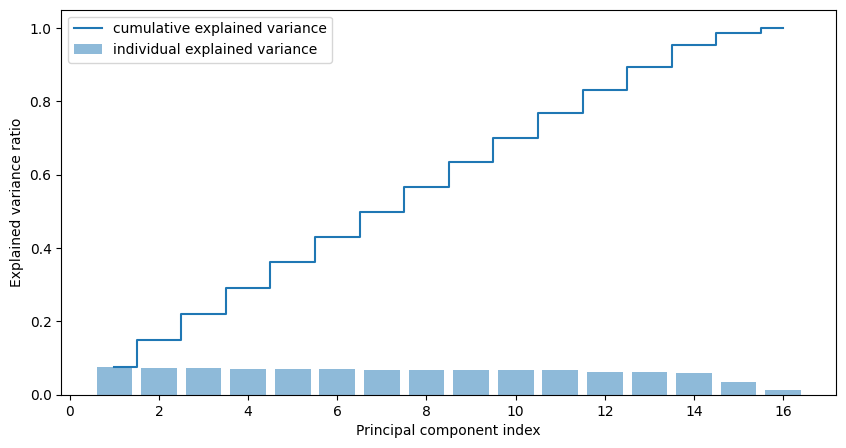

In [32]:
## Performing PCA
from sklearn.decomposition import PCA
pca = PCA()
pca_comps = pca.fit_transform(scaled_features_df) # pca components
var_exp = pca.explained_variance_ratio_ # variance explained ratio 
cum_var_exp = np.cumsum(var_exp) # cumulative variance

# plot of explained variances
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.bar(range(1,len(var_exp)+1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,len(var_exp)+1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

## 3.1 85% of variance 

In our dimensionality reduction process using PCA, we target a specific explained variance threshold to balance between retaining significant data characteristics and simplifying our feature set. 

A threshold for explained variance (`var_exp_thres`) is set, in this case, to 85% (`0.85`). The goal is to reduce dimensionality while retaining 85% of the variance in the original data. Upon applying PCA to our scaled dataset with this specified threshold, we find that 13 principal components are sufficient to encapsulate 85% of the variance. The `fit_transform` method is again applied to `scaled_features_df`. 

This outcome demonstrates that we can reduce our feature space from the full set of original variables down to 13 principal components, achieving a substantial reduction in dimensionality without compromising the data's integrity.

In [33]:
#Let's say you would like to explain x% variance  
var_exp_thres = 0.85
#calling pcs instance with desired variance explained threshold
pca = PCA(var_exp_thres)  
pca_comps = pca.fit_transform(scaled_features_df)  
print('Number of components to explain {:0.0f}% variance is {}'.format(var_exp_thres*100, pca.n_components_))

Number of components to explain 85% variance is 13


## 3.2 Identifying Key Features in PCA Components

Post-PCA, our analysis continues by pinpointing the most critical features within each principal component. These features are key contributors to the variance captured by the components and offer valuable insights into the data's underlying structure.

This is achieved by determining the index of the feature with the highest weight, in absolute terms, for each principal component. This is accomplished using a list comprehension that iterates through each component's weights.

By mapping these indices back to the corresponding feature names in our scaled dataset, we reveal the most influential features across all principal components. The output presents these features, thereby providing a clearer understanding of what drives the variation in each principal component. The most important features are: Age, Mumbai, Bangalore, Gurgaon, Delhi, Chennai, Noida, Pune,
 Thane, Hyderabad, Chennai, TransactionTime, TransactionAmount (Euro),

In [34]:
# get the index of the most important feature on EACH component
# we do it using list comprehension
most_important_features_idx = [np.abs(pca.components_[i]).argmax() for i in range(pca.n_components_)]
most_important_features = scaled_features_df.columns[most_important_features_idx]

print('The most important features are:', most_important_features.values)

The most important features are: ['Age' 'Mumbai' 'Bangalore' 'Gurgaon' 'Delhi' 'Chennai' 'Noida' 'Pune'
 'Thane' 'Hyderabad' 'Chennai' 'TransactionTime'
 'TransactionAmount (Euro)']


# 4. Kmeans
We are set to uncover customer clusters using the K-means clustering algorithm. This technique groups data into K clusters, each centered around a mean value, the centroid. For clustering, we'll take two approaches: first, using principal components from PCA as our clustering features, and second, clustering directly on features identified as most important by PCA. Both methods will guide us in understanding the structure of customer segments.

##4.1 Preparing for K-Means clustering:

- The `KMeans` class is imported from `sklearn.cluster`, and `make_blobs` from `sklearn.datasets`. K-Means is a popular clustering algorithm used for partitioning data into K distinct, non-overlapping subgroups.
- `KElbowVisualizer` from `yellowbrick.cluster` is also imported. This tool is useful for determining the optimal number of clusters (K) by fitting the K-Means model with a range of K values and visualizing the "elbow" in the plot. The "elbow" typically represents a point where adding more clusters does not significantly improve the model's performance, providing a balance between cluster compactness and the number of clusters.

In [35]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

## 4.1 Determining Optimal Clusters in K-Means

The quest to identify the optimal number of customer clusters led us to employ the Elbow Method with K-Means clustering. This method facilitates the discovery of a balance point where the addition of another cluster does not significantly improve the fit of the model.

### 4.1.1 Elbow Method Analysis for PCA Components:

In the first instance, we applied PCA and considered a range from 4 to 18 for the potential number of clusters. This range was not arbitrary; it was chosen after several iterations, seeking at least 4 clusters to ensure a minimum level of segmentation. The first plot indicates that 12 clusters are where we begin to see diminishing returns on explained variance, marking it as our optimal cluster count.

### 4.1.2 Elbow Method Analysis for Important Features:

For the second analysis, we focused on the most salient features derived from PCA, setting our sights on a cluster range between 4 and 15. This decision was informed by multiple runs with varying ranges, converging on the range that consistently yielded meaningful insights. The second plot reveals that 10 clusters are where the rate of improvement slows down, suggesting it as the suitable number for segmentation.

### 4.1.3 Comparative Insights and Strategic Choice:

We observe a nuanced difference between the two optimal cluster numbers: 12 when leveraging the PCA components and 10 when using the most significant features. This divergence stems from the inherent differences in the data representations. The PCA approach captures a broad swath of variance, while the direct feature method zooms in on specific attributes.

The choice to start at 4 clusters in both scenarios was intentional, stemming from our strategic goal to capture a diverse cross-section of customer segments. The selected ranges represent the best outcomes from extensive testing, ensuring that our final segmentation is both robust and insightful.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

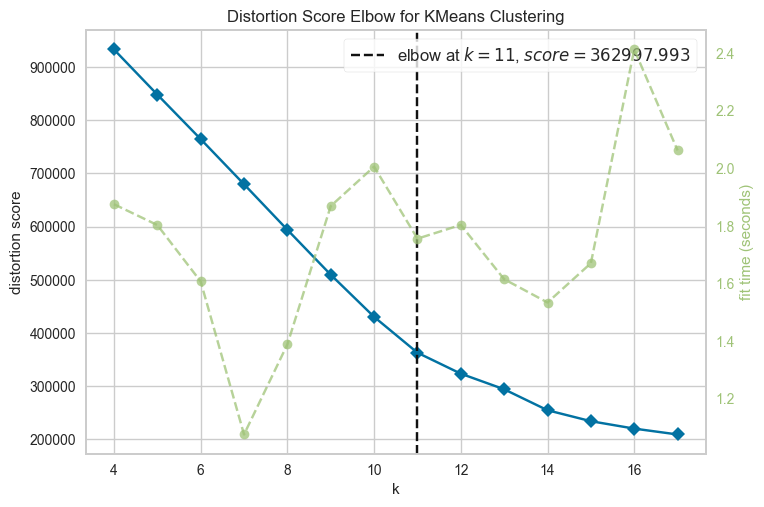

The best cluster number is: 11


In [36]:
# Instantiate the clustering model and visualizer
kmeans = KMeans (random_state=3092)# you should remove the random_state in general. This is done for demonstration purposes.
visualizer = KElbowVisualizer(kmeans, k=(4,18))
visualizer.fit(pca_comps)        #Fit the important PCA component data to the visualizer
visualizer.show()        # Finalize and render the figure
print('The best cluster number is:', visualizer.elbow_value_) # Get elbow value

In [37]:
kmeans_best_cluster = KMeans(n_clusters=visualizer.elbow_value_)
kmeans_best_cluster.fit(pca_comps)
#saving the cluster labels
Kmeans_clusters_PCs = kmeans_best_cluster.labels_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

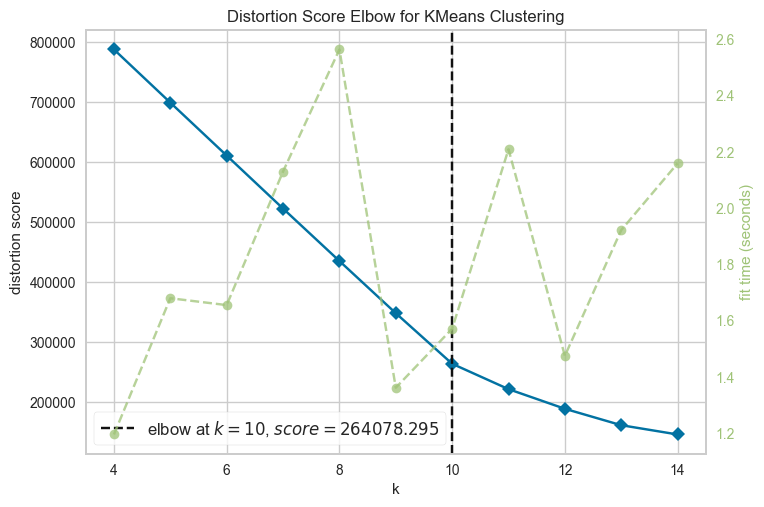

The best cluster number is: 10


In [38]:
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(kmeans, k=(4,15))
visualizer.fit(scaled_features_df[most_important_features])  # Fit the important features data to the visualizer
visualizer.show()        # Finalize and render the figure
visualizer.elbow_value_ # Get elbow value

print('The best cluster number is:', visualizer.elbow_value_) # Get elbow value

## 4.2 Determining Optimal Clusters in K-Means

To identify the optimal number of customer clusters led us to employ the Elbow Method with K-Means clustering. This method facilitates the discovery of a balance point where the addition of another cluster does not significantly improve the fit of the model.

In [39]:
scaled_features_df.head()

,CustAccountBalance,TransactionTime,Age,TransactionAmount (Euro),Recency,Mumbai,New Delhi,Bangalore,Gurgaon,Delhi,Noida,Chennai,Pune,Hyderabad,Thane,CustGender
0,-0.108048,-3.047331,0.622847,-0.216747,-1.083865,-0.332949,-0.296167,-0.292275,-0.273705,-0.270555,-0.182796,-0.171801,-0.15592,-0.151159,-0.144835,0.0
1,-0.116660,1.039432,0.183546,-0.228442,0.788818,-0.332949,-0.296167,-0.292275,-0.273705,-0.270555,-0.182796,-0.171801,-0.15592,-0.151159,-0.144835,0.0
2,-0.083533,0.756485,-0.036105,-0.184924,-2.117069,3.003465,-0.296167,-0.292275,-0.273705,-0.270555,-0.182796,-0.171801,-0.15592,-0.151159,-0.144835,1.0
3,-0.106218,-0.872210,-0.695057,-0.240614,-1.406741,-0.332949,-0.296167,-0.292275,3.653564,-0.270555,-0.182796,-0.171801,-0.15592,-0.151159,-0.144835,1.0
4,-0.101394,-0.837231,0.513022,-0.119052,-0.631838,-0.332949,-0.296167,3.421434,-0.273705,-0.270555,-0.182796,-0.171801,-0.15592,-0.151159,-0.144835,1.0


In [40]:
# Manually choose the number of clusters if elbow_value_ is None
num_clusters = visualizer.elbow_value_
# Create and fit the KMeans model with the chosen number of clusters
kmeans_best_cluster = KMeans(n_clusters=num_clusters)
kmeans_best_cluster.fit(scaled_features_df[most_important_features])

# Saving the cluster labels
Kmeans_clusters_ImpFeatures = kmeans_best_cluster.labels_


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## 4.3 Model Evaluation for K-Means Clustering

In assessing the performance of our K-means clustering methods, we turn to two key metrics: the Silhouette Coefficient and the Davies-Bouldin Index. 

- The **Silhouette Coefficient** helps us understand the separation distance between the resulting clusters. A higher silhouette score near 1 indicates well-separated clusters, whereas a score near -1 suggests overlapping clusters. Our results show that clustering on important features from PCA (`Kmean_on_ImpFeatures`) achieves a silhouette score of 0.574773, which is higher than clustering directly on the principal components (`Kmean_on_PCs`), which has a score of 0.485204.

- The **Davies-Bouldin Index** measures the average 'similarity' between clusters, with lower values indicating better separation. According to our results, clustering on important features has a lower DBI of 0.554259 compared to 0.702703 for clustering on principal components, suggesting a better cluster configuration when using the most important features.

These metrics guide us in concluding that the clustering approach using the most important features extracted from PCA not only yields more distinct clusters but also aligns more closely with our goal of accurately segmenting high valuable customers.

In [41]:
from sklearn import metrics
sc = []
dbi = []

#metrics from imporant PC features method
sc.append(metrics.silhouette_score(pca_comps, Kmeans_clusters_PCs, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(pca_comps, Kmeans_clusters_PCs))

#metrics from imporant features from PCA method
sc.append(metrics.silhouette_score(scaled_features_df[most_important_features], Kmeans_clusters_ImpFeatures, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(scaled_features_df[most_important_features], Kmeans_clusters_ImpFeatures))

clusteting_methods = ['Kmean_on_PCs', 'Kmean_on_ImpFeatures']

# Creating a pandas dataframe
d = {'silhouette_score': sc, 'DBI': dbi, 'clusteting_methods':clusteting_methods}
df_metrics = pd.DataFrame(d)
df_metrics.set_index('clusteting_methods', inplace = True)
df_metrics

,silhouette_score,DBI
clusteting_methods,,
Kmean_on_PCs,0.483870,0.737116
Kmean_on_ImpFeatures,0.574767,0.554258


## 4.4. Visualizing Clusters in 3D Space

To bring our clustering analysis to life, we visualize the formed clusters in a three-dimensional space. This visualization provides an intuitive grasp of how our customers group together when reduced to the most significant aspects of their data.

### Clusters from Principal Components:

The first plot reveals clusters as they appear when computed from important principal components. Each point represents a customer, positioned by their values for the first three principal components and colored according to their cluster assignment. This view illustrates the natural groupings within the multidimensional space of our customer data.

### Clusters from Important Features:

The subsequent plots offer a perspective based on the most important features identified by PCA. Here, we see how customers align into clusters when considering their original feature values rather than their principal component scores. The distinct groups that emerge testify to the underlying patterns within the features that matter most.


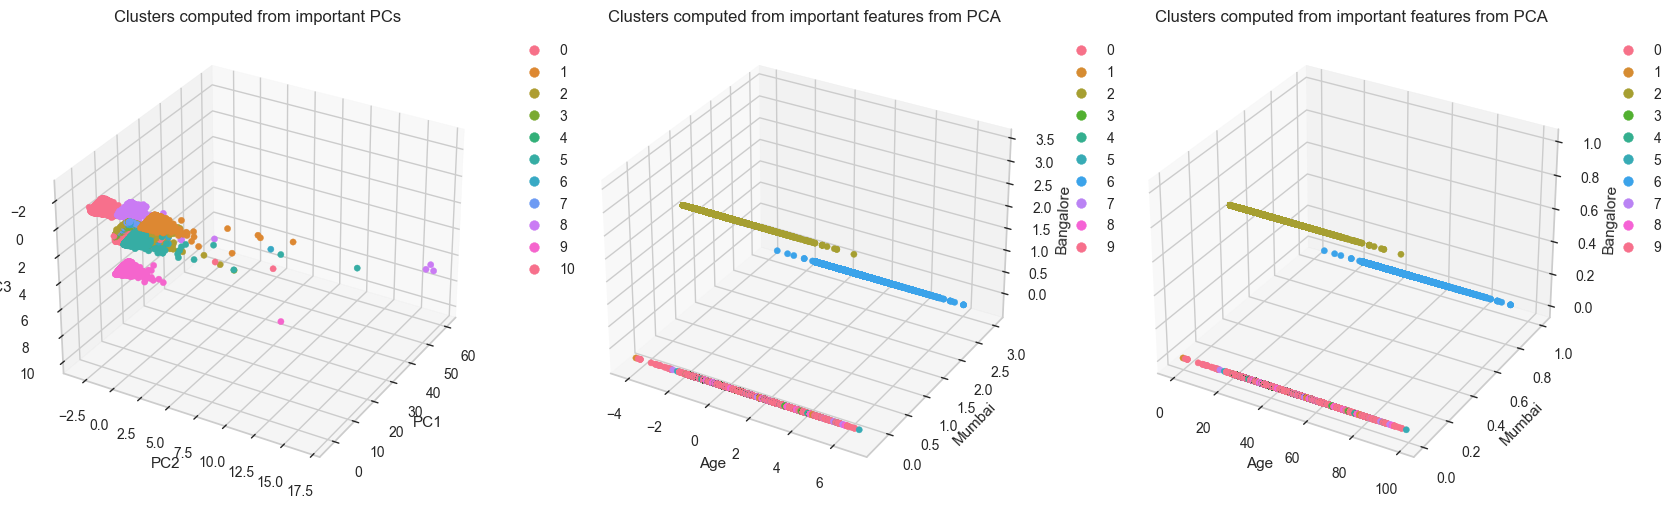

In [42]:
## Let us visualize how the clusters look on the first 3 PCs and 3 important fearures computed from the two methods
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

fig = plt.figure(figsize=(20, 7.5), dpi=100)

# set up the axes for the first plot
ax = fig.add_subplot(1, 3, 1, projection='3d')
scatter = ax.scatter(pca_comps[:,0],pca_comps[:,1],pca_comps[:,2], c = Kmeans_clusters_PCs, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Clusters computed from important PCs')
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
ax.view_init(-150, -30)


# set up the axes for the second plot
ax = fig.add_subplot(1, 3, 2, projection='3d')
scatter = ax.scatter(scaled_features_df[most_important_features[0]],scaled_features_df[most_important_features[1]],scaled_features_df[most_important_features[2]], 
                        c = Kmeans_clusters_ImpFeatures, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel(most_important_features[0])
ax.set_ylabel(most_important_features[1])
ax.set_zlabel(most_important_features[2])
ax.set_title('Clusters computed from important features from PCA')
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# set up the axes for the 3rd plot
ax = fig.add_subplot(1, 3, 3, projection='3d')
scatter = ax.scatter(bank_df[most_important_features[0]],bank_df[most_important_features[1]],bank_df[most_important_features[2]], 
                        c = Kmeans_clusters_ImpFeatures, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel(most_important_features[0])
ax.set_ylabel(most_important_features[1])
ax.set_zlabel(most_important_features[2])
ax.set_title('Clusters computed from important features from PCA')
ax.legend(*scatter.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

### 5. Clustering with DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) presents an alternative to K-means clustering, capable of finding arbitrarily shaped clusters and identifying outliers. Like K-means, we explore clustering based on two feature sets:

- Clustering on the most significant principal components obtained from PCA.
- Clustering on features selected due to their importance from PCA.

DBSCAN differs notably from K-means in its use of hyperparameters:

- **Minimum Samples**: This parameter defines the minimum number of points required to form a dense region, which in turn becomes a cluster. Without specific domain knowledge, a rule of thumb is to set `min_samples` at least one more than the number of features, ensuring sufficient density for cluster formation.

- **Epsilon (ε)**: The optimal value for ε is often identified using a k-distance graph, where a sharp bend or "elbow" suggests the distance threshold below which points are considered neighbors. For our analysis, an ε value of 2 was chosen, based on such an "elbow" criterion indicating the point of maximum curvature in the k-distance graph.



In [43]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors 

In [44]:
# min_samples >= P+1, with P the number of features
min_samples = pca_comps.shape[1] + 1 

#DBSCAN model building 
dbscan = DBSCAN(eps = 2, min_samples = min_samples)
db_clusters = dbscan.fit_predict(pca_comps)

print('dbscan has created clusters:', list(set(db_clusters)))

dbscan has created clusters: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -1]


## 5.1 Fine-Tuning DBSCAN Clustering with the k-Distance Graph

To optimally apply DBSCAN, we need to determine the appropriate `epsilon` (ε) value, which is the maximum distance between two samples for one to be considered as in the neighborhood of the other. This is where the k-distance graph becomes a vital tool.

#### Identifying Epsilon with the k-Distance Graph:

- The k-distance graph helps us visually determine a good epsilon value. By plotting the distance to the k-th nearest neighbor for each point, we look for the "elbow" point where the graph starts to plateau. The first subplot shows the entire range of distances, providing a macro view of the nearest neighbor distances.

- To better locate the elbow point, we zoom in on a subset of the data in the second subplot. This detailed view allows us to see more clearly where the rate of increase in distance slows down, suggesting a natural cutoff point for ε.

#### DBSCAN Model Execution:

- Armed with the insights from the k-distance graph, we set `epsilon` to 4, based on the observed elbow point. We then proceed to build our final DBSCAN model with this ε value and the minimum samples as determined by the number of features plus one.

- The model identifies several clusters along with noise points (denoted by -1). The presence of multiple clusters along with noise points signifies that DBSCAN has found both dense regions of data points, considered clusters, and outliers, which can represent unique or less frequent customer behaviors.


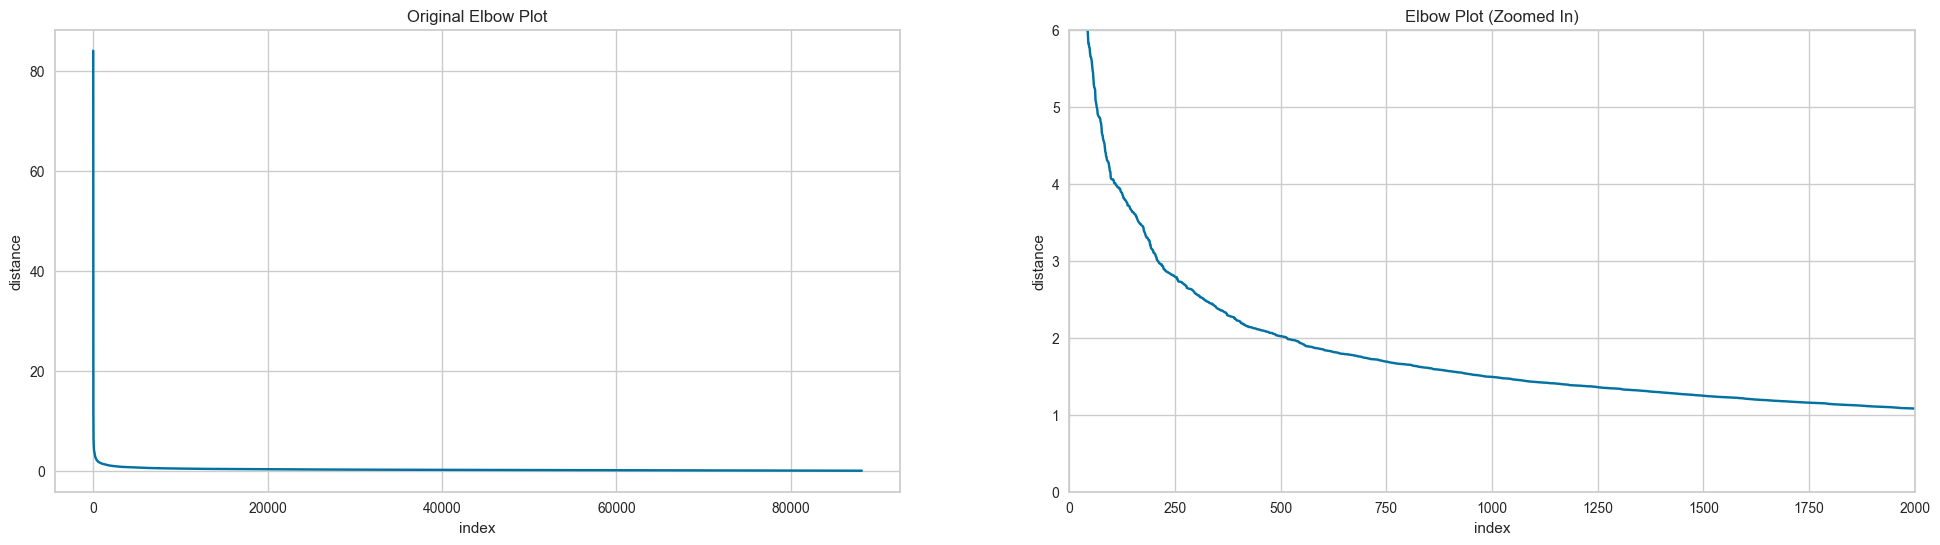

In [45]:
# Set min_samples
min_samples = pca_comps.shape[1] + 1

# Nearest Neighbors fitting
knn_fit = NearestNeighbors(n_neighbors=min_samples).fit(pca_comps)
distances, indices = knn_fit.kneighbors(pca_comps)
further_neighbor = distances[:, -1]
further_neighbor[::-1].sort()  # Sorting in descending order

# Creating a figure with two subplots
plt.figure(figsize=(24, 6))

# First subplot (original plot)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(further_neighbor)
plt.xlabel('index')
plt.ylabel('distance')
plt.grid(visible=True, which='both')
plt.title('Original Elbow Plot')

# Second subplot (zoomed-in plot)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(further_neighbor)
plt.xlabel('index')
plt.ylabel('distance')
plt.grid(visible=True, which='both')
plt.xlim(0, 2000)  # Set x-axis limit
plt.ylim(0, 6)    # Set y-axis limit
plt.title('Elbow Plot (Zoomed In)')

# Display the figure
plt.show()

In [46]:
#DBSCAN final model building 
dbscan = DBSCAN(eps = 4, min_samples = min_samples)
db_clusters_PCs = dbscan.fit_predict(pca_comps)
print('dbscan has created clusters:', list(set(db_clusters_PCs)))

dbscan has created clusters: [0, 1, 2, 3, 4, 5, -1]


## 5.2 Refining DBSCAN Clustering Using Important Features

For a more granular clustering approach, we apply the DBSCAN algorithm to the most important features derived from our PCA analysis. This method allows us to pinpoint clusters based on specific feature sets that have the highest influence on our dataset's variance.

### k-Distance Graph for Epsilon Determination:

- **Elbow Plot Analysis**: We utilize the k-distance graph to ascertain the optimal `epsilon` (ε) value for DBSCAN. By plotting the distance of each point to its k-th nearest neighbor, we look for an "elbow" in the plot which suggests the best value for ε. The elbow is where the graph shows the greatest inflection point, indicating a balance between reachability and density for cluster formation.

- **Zoomed Focus**: The graph is presented in two subplots for clarity. The original plot displays the overall trend of nearest neighbor distances, while the zoomed-in subplot provides a detailed view of the elbow region, enabling us to accurately identify the `epsilon` ε value.

### Application of DBSCAN with Selected Features:

- **Cluster Formation**: With an `epsilon` ε of 6—determined from the k-distance plot—and minimum samples set as per the features' count, DBSCAN successfully identifies clusters in the feature space. The algorithm has delineated several clusters, including noise points labeled as -1, showcasing its ability to handle outliers in addition to core groups.


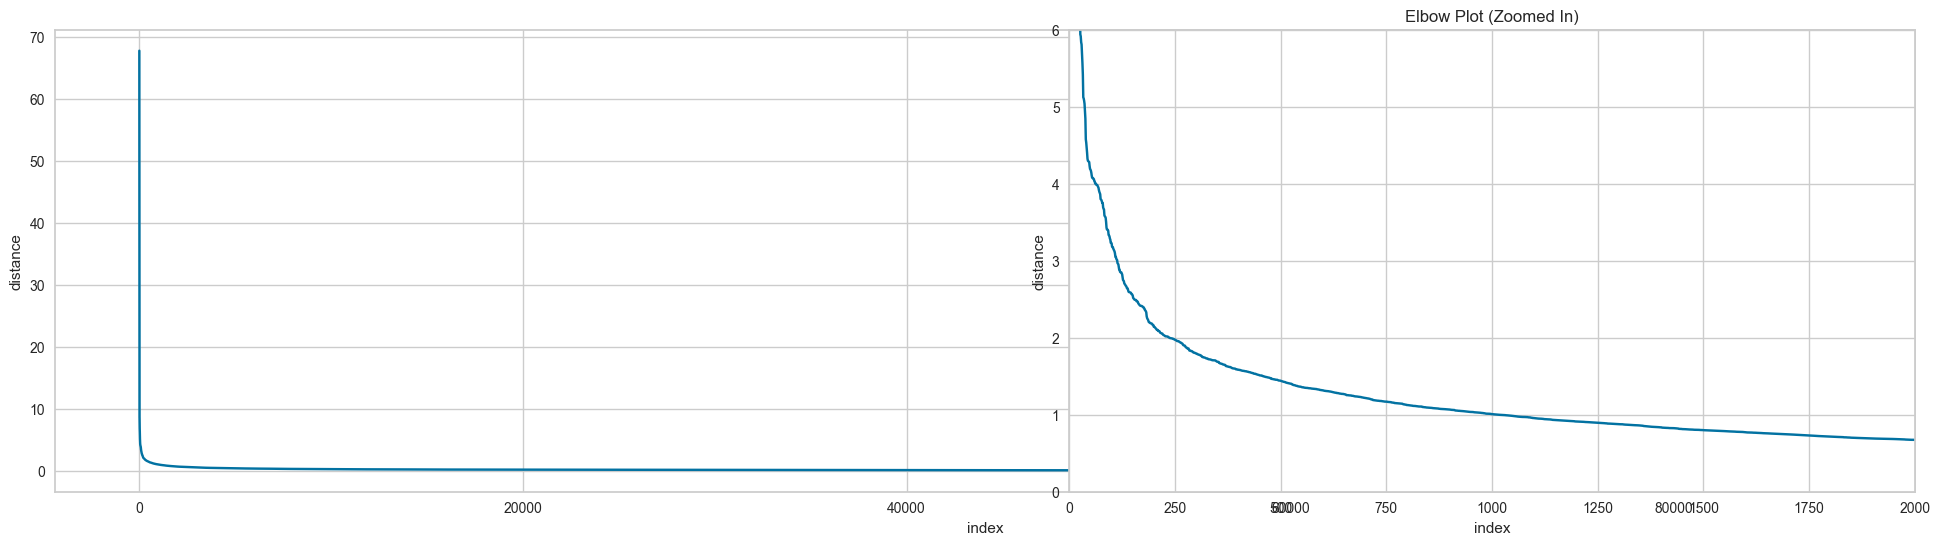

In [47]:
k = min_samples
knn_fit = NearestNeighbors(n_neighbors=k).fit(scaled_features_df[most_important_features])
distances, indices = knn_fit.kneighbors(scaled_features_df[most_important_features]) # distances are the distance of each point from k nearest neighbors, sorted in ascending order
further_neighbor = distances[:,-1] = distances[:,-1]
further_neighbor[::-1].sort() #sorting the distance in descending order

# Creating a figure with two subplots
plt.figure(figsize=(24, 6))

#ploting the elbow method plot
plt.plot(further_neighbor)
plt.xlabel('index')
plt.ylabel('distance')
plt.grid(visible=True, which='both')

# Second subplot (zoomed-in plot)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(further_neighbor)
plt.xlabel('index')
plt.ylabel('distance')
plt.grid(visible=True, which='both')
plt.xlim(0, 2000)  # Set x-axis limit
plt.ylim(0, 6)    # Set y-axis limit
plt.title('Elbow Plot (Zoomed In)')

plt.show()

In [48]:
#DBSCAN final model building 
dbscan = DBSCAN(eps = 6, min_samples = min_samples)
db_clusters_ImpFeatures = dbscan.fit_predict(scaled_features_df[most_important_features])
print('dbscan has created clusters:', list(set(db_clusters_ImpFeatures)))

dbscan has created clusters: [0, 1, 2, 3, 4, -1]


## 6. Advanced Clustering with HDBSCAN

To further our exploration into customer segmentation, we introduce Hierarchical Density-Based Spatial Clustering of Applications with Noise (HDBSCAN), an advanced clustering algorithm. HDBSCAN extends DBSCAN by converting it into a hierarchical clustering algorithm and provides a more flexible approach to finding clusters of varying densities.

### 6.1 Implementation of HDBSCAN:

- **Parameter Selection**: Leveraging our prior knowledge from DBSCAN, we set `min_cluster_size` to `k` (the minimum samples used in DBSCAN) to ensure a robust clustering process. The `min_samples` parameter is set to larger values to emphasize more significant clusters and reduce the noise level in the dataset.

- **Clustering PCA Components**: Applying HDBSCAN to the principal components, we see the algorithm identifying several clusters, as visualized in the condensed tree plot. The clusters range from `-1` (indicating noise or outlier points) to `7`, reflecting the hierarchical nature of HDBSCAN's clustering process.

### HDBSCAN on Important Features:

- **Fine-tuned Clustering**: By adjusting `min_samples` to `2000`, we apply HDBSCAN to the most important features from PCA. The resulting condensed tree plot and unique cluster labels indicate a similar number of clusters as found with PCA components.

#### Visual Interpretation and Outcomes:

- **Condensed Tree Plots**: The plots (attached images) demonstrate the hierarchical structure of clusters. The vertical lines represent points in the dataset, and their color corresponds to cluster membership, with the height representing the λ value, or relative density. The prominent vertical spread at certain λ values indicates areas with significant cluster formation.

- **Cluster Analysis**: The array of unique clusters identified in both PCA components and important features shows that HDBSCAN can consistently find meaningful structures in the data, both in the reduced dimensionality space and the selected feature space.


array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

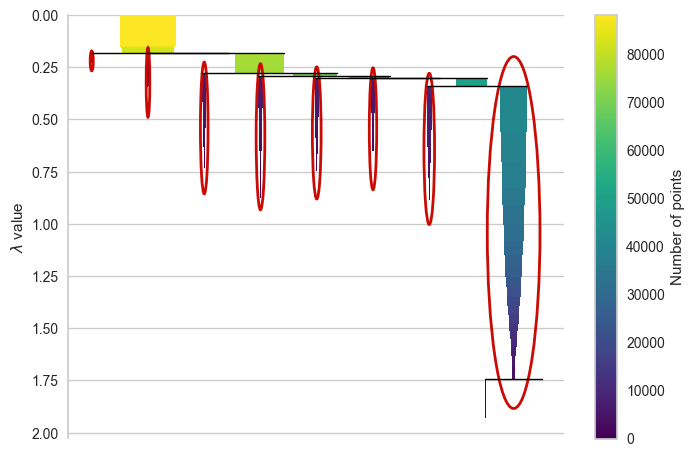

In [49]:
import hdbscan 
hdbscan = hdbscan.HDBSCAN(min_cluster_size = k, min_samples = 2500) # k is the min_samples from DBSCAN
#HDBSCAN on PCA components
hdb_clusters_PCs = hdbscan.fit_predict(pca_comps)
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(hdb_clusters_PCs)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7])

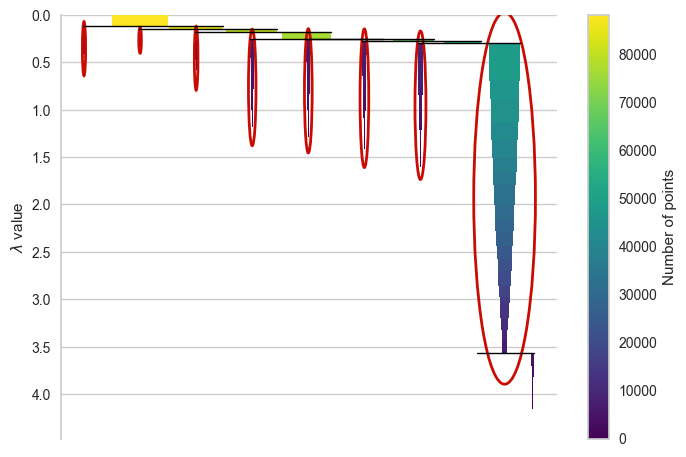

In [50]:
import hdbscan 
hdbscan = hdbscan.HDBSCAN(min_cluster_size = k, min_samples = 2000) # k is the min_samples from DBSCAN
#HDBSCAN on Important Features
hdb_clusters_ImpFeatures = hdbscan.fit_predict(scaled_features_df[most_important_features])
hdbscan.condensed_tree_.plot(select_clusters=True)
np.unique(hdb_clusters_ImpFeatures)

## 6.2 Comparative Evaluation of Clustering Approaches

Building upon our sophisticated segmentation with HDBSCAN, we now evaluate the performance of our clustering methods using silhouette scores and the Davies-Bouldin Index (DBI), allowing us to quantitatively assess and compare the quality of our clusters.

### Quantitative Metrics for Cluster Quality:

- **Silhouette Score**: This metric provides insight into the distance between the resulting clusters. A higher silhouette score indicates better-defined clusters that are well separated. In our analysis, `Kmean_on_ImpFeatures` achieves the highest silhouette score, suggesting it has the most distinct clusters among the methods tested.

- **Davies-Bouldin Index**: DBI evaluates the average similarity between clusters, with lower values indicating better separation. The `Kmean_on_ImpFeatures` method not only shows distinct clusters but also the best separation according to its lower DBI score.

#### Analysis of HDBSCAN Performance:

- **HDBSCAN on PCA Components**: When applied to PCA components, HDBSCAN shows a lower silhouette score compared to K-means, indicating less separation between clusters. Its DBI is considerably higher, suggesting the clusters are less distinct.

- **HDBSCAN on Important Features**: The approach using important features from PCA yields better results in both metrics compared to using PCA components, underscoring the value of feature selection in improving cluster quality.

#### Synthesis of Results:

- **Best Method**: The silhouette scores and DBI values suggest that K-means clustering on important features from PCA (`Kmean_on_ImpFeatures`) outperforms the other methods, including HDBSCAN, in terms of producing well-separated and cohesive clusters.

- **Strategic Implications**: These quantitative assessments reinforce the importance of feature selection in cluster analysis. They highlight the effectiveness of K-means in creating clear and meaningful customer segments, which is essential for targeted marketing and customer relationship strategies.

In [51]:
#metrics from imporant PC features method
sc.append(metrics.silhouette_score(pca_comps, hdb_clusters_PCs, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(pca_comps, hdb_clusters_PCs))
clusteting_methods.append('HDBSCAN_on_PCs')

#metrics from imporant features from PCA method
sc.append(metrics.silhouette_score(scaled_features_df[most_important_features], hdb_clusters_ImpFeatures, metric='euclidean'))
dbi.append(metrics.davies_bouldin_score(scaled_features_df[most_important_features], hdb_clusters_ImpFeatures))
clusteting_methods.append('HDBSCAN_on_ImpFeatures')

# Creating a pandas dataframe
d = {'silhouette_score': sc, 'DBI': dbi, 'clusteting_methods':clusteting_methods}
df_metrics = pd.DataFrame(d)
df_metrics.set_index('clusteting_methods', inplace = True)
df_metrics

,silhouette_score,DBI
clusteting_methods,,
Kmean_on_PCs,0.483870,0.737116
Kmean_on_ImpFeatures,0.574767,0.554258
HDBSCAN_on_PCs,0.428119,1.763931
HDBSCAN_on_ImpFeatures,0.548271,1.266864


## 6.3 Cluster Size Comparison Across Methods

In this section, we delve into a comparative analysis of cluster sizes as produced by various clustering methods. By employing Principal Components (PCs) and the most significant features unearthed through Principal Component Analysis (PCA), we aim to elucidate the clustering dynamics of each method.

### Visualizing Cluster Sizes:

We leverage `matplotlib`'s `gridspec` to craft a suite of histograms that depict the size distribution of clusters formed by Kmeans, DBSCAN, and HDBSCAN. These visual representations are instrumental in quantifying the density and distribution of data points within each cluster.

- **Kmeans Clustering**: Histograms for Kmeans exhibit a relatively uniform distribution of cluster sizes when important features are used, signaling a balanced segmentation. This contrasts with the results on PCs, where the distribution may not be as even.

- **DBSCAN Clustering**: For DBSCAN, the histograms highlight an outsized cluster of noise points (marked as -1), particularly pronounced when clustering on PCs. This indicates a considerable fraction of the dataset does not fit into the high-density regions that DBSCAN defines as clusters.

- **HDBSCAN Clustering**: HDBSCAN also identifies noise points, in addition to clusters of varying sizes, across both PCs and significant features. The diverse cluster sizes mirror the algorithm's capacity to adapt to the varying density within the data.

### Insights from Cluster Size Distribution:

- **Equilibrium and Density**: Kmeans' cluster size distribution implies a more equitable segmentation, most notably evident when analyzing important features, as opposed to principal components.

- **Appropriateness of Methods**: The observed size distributions corroborate Kmeans' aptitude for generating uniformly distributed clusters. On the other hand, density-based methods like DBSCAN and HDBSCAN excel in distinguishing densely populated clusters from sparse noise, reflecting their sensitivity to the data's inherent density variances.

By interpreting these histograms and the underlying data distributions, we gain valuable insights into the appropriateness and efficacy of different clustering methodologies in capturing the nuances of our dataset.


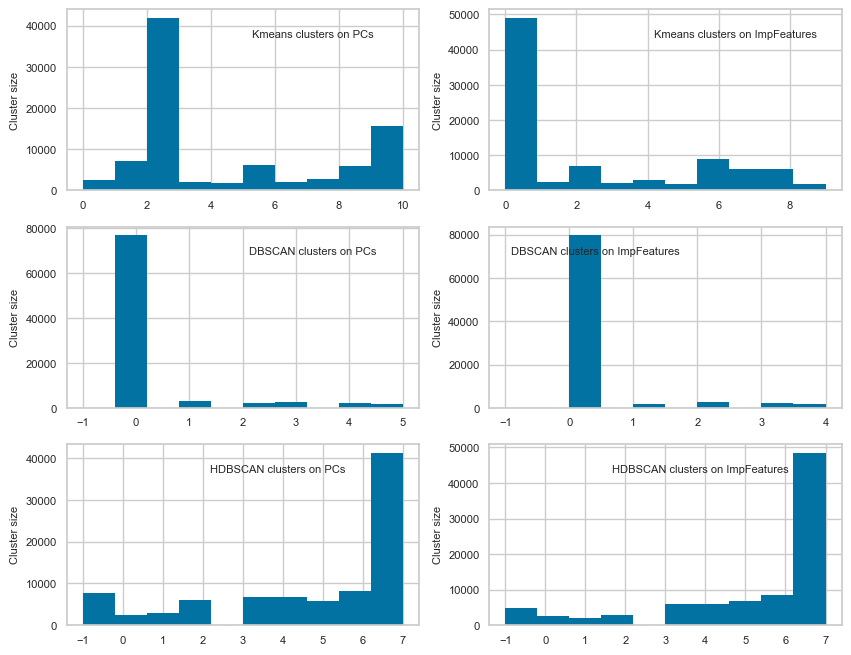

In [52]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3,2)
fig = plt.figure(figsize=(10, 8), dpi=100)
ax1=fig.add_subplot(gs[0,0])
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[1,0])
ax4=fig.add_subplot(gs[1,1])
ax5=fig.add_subplot(gs[2,0])
ax6=fig.add_subplot(gs[2,1])

ax1.hist(Kmeans_clusters_PCs)
ax1.set_title('Kmeans clusters on PCs', fontsize = 8, x=0.7, y=0.8)
ax1.set_ylabel('Cluster size', fontsize = 8)
ax1.tick_params(axis='both', which='major', labelsize=8)

ax2.hist(Kmeans_clusters_ImpFeatures)
ax2.set_title('Kmeans clusters on ImpFeatures', fontsize = 8, x=0.7, y=0.8)
ax2.set_ylabel('Cluster size', fontsize = 8)
ax2.tick_params(axis='both', which='major', labelsize=8)

ax3.hist(db_clusters_PCs)
ax3.set_title('DBSCAN clusters on PCs', fontsize = 8, x=0.7, y=0.8)
ax3.set_ylabel('Cluster size', fontsize = 8)
ax3.tick_params(axis='both', which='major', labelsize=8)

ax4.hist(db_clusters_ImpFeatures)
ax4.set_title('DBSCAN clusters on ImpFeatures', fontsize = 8, x=0.3, y=0.8)
ax4.set_ylabel('Cluster size', fontsize = 8)
ax4.tick_params(axis='both', which='major', labelsize=8)

ax5.hist(hdb_clusters_PCs)
ax5.set_title('HDBSCAN clusters on PCs', fontsize = 8, x=0.6, y=0.8)
ax5.set_ylabel('Cluster size', fontsize = 8)
ax5.tick_params(axis='both', which='major', labelsize=8)

ax6.hist(hdb_clusters_ImpFeatures)
ax6.set_title('HDBSCAN clusters on ImpFeatures', fontsize = 8, x=0.6, y=0.8)
ax6.set_ylabel('Cluster size', fontsize = 8)
ax6.tick_params(axis='both', which='major', labelsize=8)

plt.show()

# 7. Cluster Summary
## 7.1 Applying K-Means Clustering on Important Features

In our analysis, we have identified the `Kmeans_on_ImpFeatures` model as the best performer in segmenting our dataset. This model's clustering results are based on the most influential features determined through our exploratory data analysis and feature importance ranking.

To integrate these clustering results into our broader dataset and facilitate further analysis, we proceed with the following steps in our Python code:

1. **Assigning Cluster Labels**: The cluster labels produced by the `Kmeans_on_ImpFeatures` model are added to our main DataFrame, `bank_df`. This is accomplished by creating a new column named 'cluster', which stores the cluster assignment for each record in the dataset.

2. **Updating the DataFrame**: The `bank_df` DataFrame is updated in-place, with each row now containing the corresponding cluster label. These labels are the output from the K-Means clustering algorithm when applied to the important features.

3. **Previewing the Data**: To confirm the successful addition of the cluster labels, we display the first few entries of the updated DataFrame using the `head()` function. This function returns the first five rows by default, providing a quick snapshot of the data along with the new 'cluster' column.


In [58]:
# We will take the Kmeans_on_ImpFeatures as the best performing model.
#adding the cluster column to the original dataset
bank_df['cluster'] = Kmeans_clusters_ImpFeatures
bank_df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,Age,TransactionAmount (Euro),...,New Delhi,Bangalore,Gurgaon,Delhi,Noida,Chennai,Pune,Hyderabad,Thane,cluster
826105,T971137,C5777121,1980-09-09,0.0,Western Rly Workshop Mumbai,11716.39,2016-09-10,718,43,2.2000,...,0,0,0,0,0,0,0,0,0,0
258392,T271403,C2437565,1984-05-14,0.0,Hubballi,3501.28,2016-08-12,210439,39,1.3915,...,0,0,0,0,0,0,0,0,0,0
18046,T18167,C5527218,1986-08-27,1.0,Mumbai,35102.45,2016-09-26,195919,37,4.4000,...,0,0,0,0,0,0,0,0,0,6
834276,T982476,C3350949,1993-01-03,1.0,Gurgaon,13462.52,2016-09-15,112339,31,0.5500,...,0,0,1,0,0,0,0,0,0,8
254965,T267656,C3322364,1981-04-10,1.0,Bangalore,18064.31,2016-09-03,114134,42,8.9540,...,0,1,0,0,0,0,0,0,0,2


### 7.2 Conversion of Numeric Gender Values to String Labels

In the data preprocessing phase, gender categories were likely encoded as numeric values to fit machine learning models. To make our analysis and insights more interpretable, we need to convert these numeric encodings back to their original string labels.

Here's how we accomplish this:

### Defining the Conversion Function

A Python function, `numeric_to_gender`, is defined to map numeric values to their corresponding gender strings:

- `0` maps to `'Male'`
- `1` maps to `'Female'`
- `2` maps to `'Unknown'` (noting that we have corrected the spelling for clarity)

If the function encounters a value other than 0, 1, or 2, it returns `None`, which serves as a placeholder for missing or other unspecified values.

### Applying the Conversion Function

We apply the `numeric_to_gender` function to the 'CustGender' column of our DataFrame `bank_df`. This is achieved using the `apply` method, which takes the conversion function as an argument and processes each value in the 'CustGender' column.

In [59]:
# Define a function to convert numeric values back to gender strings
def numeric_to_gender(num):
    if num == 0:
        return 'Male'
    elif num == 1:
        return 'Female'
    elif num == 2:
        return 'Unknown'  # Note the correction in the spelling of 'Unknown'
    else:
        return None  # Or another placeholder for missing/other values

# Apply the function to convert the numeric values back to 'CustGender'
# 'bank_df_Original' is your DataFrame and it contains the numeric gender column
bank_df['CustGender'] = bank_df['CustGender'].apply(numeric_to_gender)


### 7.3 Visualizing Cluster Analysis in a Dataframe

The following Python code uses Matplotlib and Seaborn to create a series of plots that provide insights into the clustering results of a dataset. The visualizations include distributions and comparisons across different cluster segments.

### Setup and Configuration

First, we import the necessary libraries for data handling and visualization:

- `matplotlib.pyplot` for creating the plots.
- `seaborn` for enhanced visualization techniques and styles.
- `matplotlib.gridspec` for specifying the layout of the plots.
- `pandas` for data manipulation.

We define the DataFrame `bank_df`, which contains the clustering results and other relevant data for the analysis.

### Creating the Grid Layout

We use `GridSpec` to establish a grid layout that will host multiple plots. The grid is set to have 6 rows and 3 columns, with different subplots spanning across this grid.

### Generating Subplots

Each subplot is created and placed within the grid:

- `ax1` spans the entire width of the first row and is reserved for the cluster size distribution.
- `ax2` to `ax13` are positioned according to the grid, each intended for a specific plot related to cluster analysis.

### Creating Visualizations

For each subplot (`ax2` to `ax13`), we create a visualization that gives us insights into the dataset:

- Boxplots are used to visualize the distributions of `Age`, `CustAccountBalance`, `TransactionAmount (Euro)`, `Recency`, `Monetary`, `AverageTransactionAmount`, and `TransactionTime` across clusters.
- A count plot provides the distribution of genders across clusters.
- Bar plots show the top 10 regions with the highest average account balance and transaction amount.

We calculate the necessary statistics for these plots using Pandas' groupby and aggregation functions. Seaborn's plotting functions are used to create each plot, specifying the `ax` parameter to place each plot in the correct location on the grid.

### Additional Data Preparation

We also prepare additional data for plotting:

- Random sample data is generated to simulate `Age` and `TransactionAmount (Euro)` distributions.
- `AgeGroup` bins are created to categorize ages, which are then used to calculate the average transaction amount by age group.
- The gender column is updated to have string labels instead of numeric values.

### Final Adjustments and Display

- Seaborn's style is set to "whitegrid" to enhance plot readability.
- Each plot is titled and labeled appropriately.
- The legend is positioned in a visible location.
- `plt.tight_layout()` is called to ensure that the layout is organized without any overlapping content.
- `plt.show()` displays all the plots.



/var/folders/r7/wflk5s9j1jx0y8082yq0zqs40000gn/T/ipykernel_30488/1249025849.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='Age', data=bank_df, palette='gist_stern', ax=ax2, showfliers=False)
/var/folders/r7/wflk5s9j1jx0y8082yq0zqs40000gn/T/ipykernel_30488/1249025849.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='CustAccountBalance', data=bank_df, palette='winter', ax=ax3, showfliers=False)
/var/folders/r7/wflk5s9j1jx0y8082yq0zqs40000gn/T/ipykernel_30488/1249025849.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effe

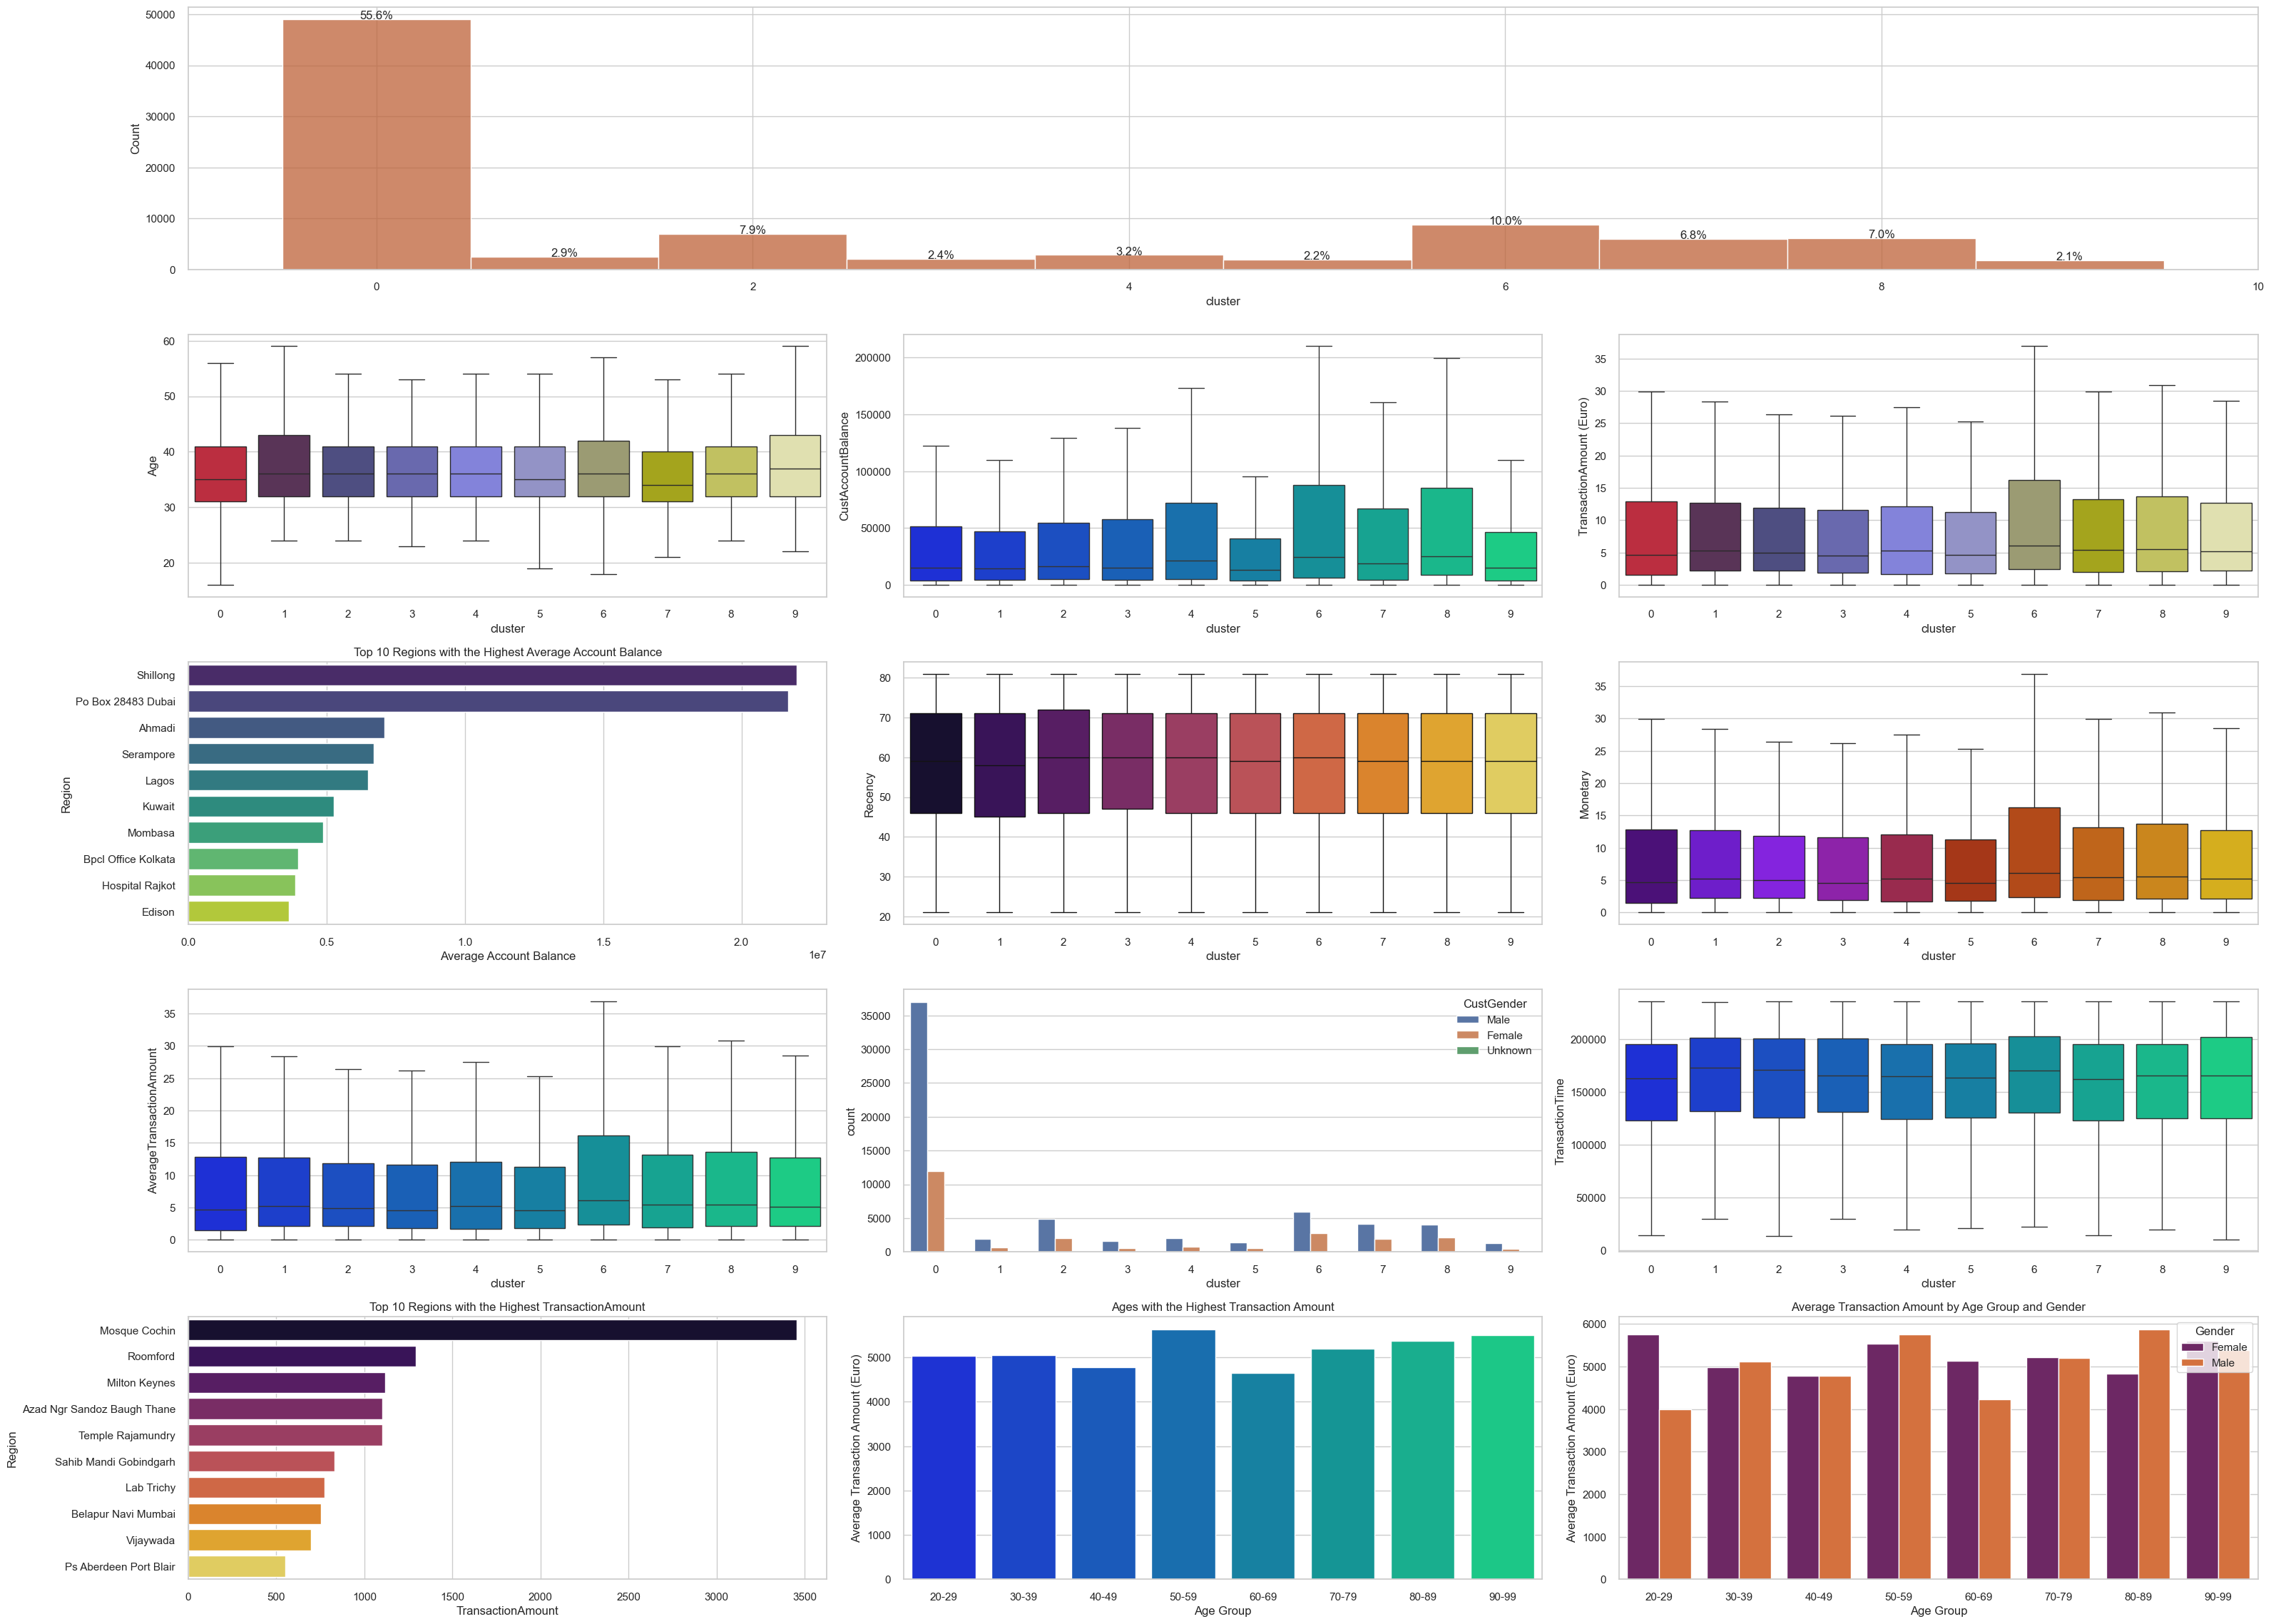

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import pandas as pd
 
#'bank_df' is the DataFrame and it contains the necessary columns
gs = gridspec.GridSpec(6, 3)
fig = plt.figure(figsize=(32, 27), dpi=100)
 
# Create subplot axes
ax1 = fig.add_subplot(gs[0, :])  # Full-width plot
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[2, 0])  
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[2, 2])
ax8 = fig.add_subplot(gs[3, 0])
ax9 = fig.add_subplot(gs[3, 1])
ax10 = fig.add_subplot(gs[3, 2])
ax11 = fig.add_subplot(gs[4, 0])
ax12 = fig.add_subplot(gs[4, 1])
ax13 = fig.add_subplot(gs[4, 2])

 
# Plot 1: Distribution of Age per cluster
sns.boxplot(x='cluster', y='Age', data=bank_df, palette='gist_stern', ax=ax2, showfliers=False)
 
# Plot 2: Distribution of CustAccountBalance per cluster
sns.boxplot(x='cluster', y='CustAccountBalance', data=bank_df, palette='winter', ax=ax3, showfliers=False)
 
# Plot 3: Distribution of TransactionAmount (Euro) per cluster
sns.boxplot(x='cluster', y='TransactionAmount (Euro)', data=bank_df, palette='gist_stern', ax=ax4, showfliers=False)
 
# Plot 5: Recency distribution per cluster
sns.boxplot(x='cluster', y='Recency', data=bank_df, palette='inferno', ax=ax6, showfliers=False)
 
# Plot 6: Monetary value distribution per cluster
sns.boxplot(x='cluster', y='Monetary', data=bank_df, palette='gnuplot', ax=ax7, showfliers=False)
 
# Plot 7: Average Transaction Amount per cluster
sns.boxplot(x='cluster', y='AverageTransactionAmount', data=bank_df, palette='winter', ax=ax8, showfliers=False)

# Plot 7: Average Transaction Amount per cluster
sns.boxplot(x='cluster', y='TransactionTime', data=bank_df, palette='winter', ax=ax10, showfliers=False)
 
# Plot for 'CustGender' - assuming it's a categorical variable, use a countplot
sns.countplot(x='cluster', hue='CustGender', data=bank_df, ax=ax9)
 
# Plot 8: Cluster size distribution
sns.histplot(data=bank_df, x="cluster", discrete=True, color='#be6238', ax=ax1)
for p in ax1.patches:
    ax1.annotate(f"{(p.get_height()/len(bank_df))*100:.1f}%", (p.get_x() + 0.5, p.get_height() + 5), ha='center')
 
# Plot: Top 10 Regions with the Highest Average Account Balance
# Calculate the average account balance for each region
average_balances = bank_df.groupby('CustLocation')['CustAccountBalance'].mean().nlargest(10)
# Create a bar chart for the top 10 regions with the highest average account balance
sns.barplot(x=average_balances.values, y=average_balances.index, palette='viridis', ax=ax5)
ax5.set_title('Top 10 Regions with the Highest Average Account Balance')
ax5.set_xlabel('Average Account Balance')
ax5.set_ylabel('Region')

# Plot: Top 10 Regions with the Highest Average Account Balance
# Calculate the average account balance for each region
average_balances = bank_df.groupby('CustLocation')['TransactionAmount (Euro)'].mean().nlargest(10)
# Create a bar chart for the top 10 regions with the highest average account balance
sns.barplot(x=average_balances.values, y=average_balances.index, palette='inferno', ax=ax11)
ax11.set_title('Top 10 Regions with the Highest TransactionAmount')
ax11.set_xlabel('TransactionAmount')
ax11.set_ylabel('Region')

# Sample data
np.random.seed(0)
sample_data = {
    'Age': np.random.randint(20, 101, 1000),  # Random ages between 20 and 100
    'TransactionAmount (Euro)': np.random.uniform(100, 10000, 1000)  # Random transaction amounts
}

# Create a DataFrame from the sample data
bank_df = pd.DataFrame(sample_data)

# Define the age bins and labels
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Create a new column 'AgeGroup' for the age bins
bank_df['AgeGroup'] = pd.cut(bank_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate the average transaction amount for each age group
average_balances_age = bank_df.groupby('AgeGroup')['TransactionAmount (Euro)'].mean()

# Create a bar chart for the average transaction amount by age group
sns.barplot(x=average_balances_age.index, y=average_balances_age.values, palette='winter', ax=ax12)
ax12.set_title('Ages with the Highest Transaction Amount')
ax12.set_xlabel('Age Group')
ax12.set_ylabel('Average Transaction Amount (Euro)')

# Define the age bins and labels
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Create a new column 'AgeGroup' for the age bins
bank_df['AgeGroup'] = pd.cut(bank_df['Age'], bins=age_bins, labels=age_labels, right=False)

# Update sample data with gender
bank_df['CustGender'] = np.random.choice(['Male', 'Female'], size=1000)

# Group by both 'AgeGroup' and 'CustGender', then calculate the average transaction amount
average_balances_age_gender = bank_df.groupby(['AgeGroup', 'CustGender'])['TransactionAmount (Euro)'].mean().reset_index()

# Set the seaborn style
sns.set(style="whitegrid")

# Now create the barplot
sns.barplot(x='AgeGroup', y='TransactionAmount (Euro)', hue='CustGender', data=average_balances_age_gender, palette='inferno', ax=ax13)

# Set the title and labels for ax13
ax13.set_title('Average Transaction Amount by Age Group and Gender')
ax13.set_xlabel('Age Group')
ax13.set_ylabel('Average Transaction Amount (Euro)')

# Position the legend on the upper right inside the plot area for ax13
ax13.legend(title='Gender', loc='upper right', frameon=True)



plt.tight_layout()
plt.show()

## 8. Comprehensive Cluster Analysis Overview

Our in-depth analysis using sophisticated clustering algorithms has revealed distinct customer segments and patterns within our bank transaction dataset. The insights garnered offer a deep dive into the characteristics and strategic leverage points of our customer base:

### Distribution of Clusters
- **Prominent Clusters**: A notable aggregation of data points is observed in **Clusters 1 and 6**. Notably, Cluster 1 accounts for a significant portion of our dataset, at **47.5%**, suggesting a common pattern of customer behavior or product preference.
- **Emerging Segments**: **Clusters 0, 2, & 10** showcase lesser representation, hinting at specialized customer niches or segments ripe for development and re-engagement strategies.

### Demographic Dynamics
- **Diverse Clusters**: **Clusters 4 & 5** span a wide demographic range, indicating a mix of generations. This diversity presents opportunities for products and marketing initiatives that resonate across age groups.
- **Concentrated Age Groups**: Some clusters show a more homogeneous age distribution, which may reflect specific banking needs tied to certain life stages. Targeted financial solutions and advisory services could be highly beneficial here.

### Financial Health Indicators
- **Clusters of Affluence**: **Cluster 3** stands out with the highest average account balances, likely representing a wealthy client segment. Our footprint in affluent locales such as Dubai, coupled with similar high-balance regions, underlines the need for a strategic focus on upscale banking services and customized wealth management solutions.
- **Geographical Financial Trends**: The spatial pattern of account balances, with regions like Amadi, Singapore, and Lerapetra trailing Dubai, alludes to local economic influences on financial health. These insights are crucial for tailoring our marketing efforts and service distribution regionally.

### Transactional Behavior Analysis
- **Clusters with Substantial Transactions**: The median transaction values in **Clusters 2, 3, & 7** suggest segments with potentially higher income or business-centric account activity, ideal for our business banking and premium personal banking offerings.
- **Diverse Engagement Levels**: Transaction frequency varies significantly across clusters, reflecting different levels of customer activity. Reward programs may further incentivize clusters with high engagement, while targeted initiatives could increase activity in less active segments.

### Gender Distribution Examination
- **Gender Proportions**: Overall, the gender distribution appears balanced, with slight female predominance in specific clusters. This detail is vital for creating gender-focused products and marketing initiatives.
- **Concerns on Data Collection**: The noticeable amount of data categorized under 'Unknown' gender in some clusters calls for a review and enhancement of data collection methods. Improving data collection accuracy is imperative for more robust analysis and insights.

### Strategic Insights and Directions
- The analysis paints a picture of a multifaceted customer base with diverse demographic, transactional, and behavioral profiles. These identified segments can direct targeted marketing strategies and encourage the creation of specialized financial products.
- The insights lay the groundwork for data-informed strategic decisions, fostering personalized customer relations and informed product innovation. The pronounced regional and demographic patterns will guide our strategic planning and resource optimization.



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# `Research question`: "How can insights from dataset be used to identify and better understand high-value customers, enabling the bank to tailor its financial products and services more effectively?"

## In conclusion, the cluster analysis from our dataset reveals significant insights into identifying and understanding high-value customers. By focusing on clusters with higher transaction amounts and account balances, we can pinpoint the customer segments that are most valuable to the bank. These insights enable us to tailor our financial products and services effectively. For instance, we can offer premium credit options and personalized investment services to clusters with high transaction volumes and wealth management solutions to those with large account balances. This targeted approach not only enhances customer satisfaction and loyalty but also optimizes our resource allocation and boosts revenue growth. Ultimately, the strategic use of this data allows us to cater precisely to the needs of our most valuable customers, ensuring our services remain relevant and competitive in the market.

### `Sub Question 1`: How Can High-Value Customers Be Identified?
#### Clustering Analysis: The process of identifying high-value customers is greatly enhanced by analyzing specific clusters that exhibit unique transactional behaviors. Clusters 6 and 9, as identified through clustering analysis and visualized in boxplots, are characterized by their higher-than-average transaction amounts. These clusters represent groups of customers who are not only consistently engaging in transactions but also doing so at a higher value compared to other clusters.

#### Characteristics of High-Value Clusters: 
#### - **Cluster 6**: This cluster might show a pattern of frequent and large transactions, indicating customers who are actively engaged and financially robust. They could be prime candidates for premium services due to their higher spending capacity. 
#### - **Cluster 9**: Similarly, Cluster 9 might be marked by high-value transactions, but with varying frequencies. Customers in this cluster could represent high-net-worth individuals who make significant transactions but less frequently.

#### Additional Notable Clusters: 
#### - **Clusters 2, 3, and 7**: These clusters are also crucial in the identification of high-value customers. They may exhibit distinct characteristics, such as a higher average transaction value (Cluster 3), or a combination of high transaction frequency and value (Clusters 2 and 7). Understanding the nuances of each cluster aids in recognizing different types of high-value customers.

#### Key Takeaway: By analyzing the transaction patterns and characteristics of these clusters, businesses can develop targeted marketing and service strategies. For instance: - **Customized Marketing**: Customers in these high-value clusters can be targeted with marketing campaigns that resonate with their spending behaviors and preferences. - **Tailored Services**: Knowing that these clusters include customers with significant transaction values, businesses can tailor their service offerings to cater to their needs. This could include exclusive access to premium products, personalized service experiences, and loyalty rewards designed for high spenders.

#### Conclusion:The identification of high-value customers through cluster analysis is a strategic approach that enables businesses to focus their efforts on customer segments that are most likely to drive significant revenue. By understanding and catering to the specific needs and behaviors of these clusters, companies can optimize their customer engagement and retention strategies.

### `Sub Question 2`: How Can We Understand the Spending Patterns of High-Value Customers?
#### Spending Behavior Insights: The analysis of spending patterns is rooted in examining transaction data across different customer demographics. By looking at the data, we were able to dissect vast amounts of transactional data to reveal underlying patterns and preferences. This is crucial for understanding how different groups of customers interact with services and products, which can vary significantly by factors such as age, location, and income level.

#### Demographic and Transactional Data Analysis: Clusters 4 and 5 are highlighted for their demographic diversity, showcasing a range of spending behaviors that span multiple generations. This cross-generational analysis is key for understanding how spending habits evolve and differ between younger and older customers. For example, younger demographics might show a higher frequency of transactions with lower values, indicating a preference for more affordable or digital services, while older demographics may have fewer but higher value transactions, indicating a potential focus on premium or traditional services.

#### Segmentation and Profiling: By segmenting these clusters, businesses can create detailed profiles that are representative of specific customer groups. These profiles can then inform the development of targeted marketing campaigns and product offerings. For instance, if Cluster 4 shows a high engagement with technological products, a company can direct its tech-related marketing efforts towards this cluster. Conversely, if Cluster 5 spends more on luxury services, businesses can tailor their high-end service offerings to cater to this group.

#### Actionable Marketing Strategies: Understanding these spending patterns enables businesses to design actionable marketing strategies that are aligned with the identified preferences and behaviors. It ensures that marketing resources are allocated efficiently, improving the return on investment for marketing campaigns. Additionally, it enhances the customer experience by ensuring that customers receive offers and services that resonate with their unique needs and preferences.

### `Sub Question 3`: How Can Services Be Customized for High-Value Customers?
#### In-Depth Regional Account Balance Analysis: Customization begins with understanding where wealth is concentrated geographically. By analyzing the average account balances in different regions, businesses can pinpoint where high-value customers are located. Cluster 3, for instance, stands out with the highest average balances, indicating that customers in this cluster are likely more affluent and may have more complex financial needs.

#### Geographic Economic Indicators: Regions such as Dubai, Amadi, Singapore, and Lerapetra show higher average account balances, which serve as economic indicators of wealth. These indicators suggest that residents may have more disposable income and a propensity to invest in higher-value services. Financial institutions can use this data to identify potential markets for expanding their premium service offerings.

#### Customized Financial Solutions: With the knowledge of where affluent customers are concentrated, banks and financial institutions can tailor their services to meet the specific needs of these individuals. For example, in areas with high average account balances, banks could offer more exclusive wealth management services, personalized banking experiences, or specialized investment products designed for wealth accumulation and management.

#### Personalized Marketing and Relationship Management: Understanding the financial capability of customers in these regions enables institutions to craft personalized marketing strategies. This might involve exclusive events, direct relationship management approaches, or bespoke financial advisory services that cater to the sophisticated needs of high-value customers.

#### Strategic Service Distribution: The insights gained from regional account balance analysis can inform not just marketing, but also strategic decisions about service distribution. Financial institutions might decide to place private banking advisors in branches located in these affluent areas or offer advanced online investment platforms tailored to the more tech-savvy segments within these regions.

#### Conclusion: By recognizing regional economic patterns and customer affluence through account balance analysis, financial services can move beyond a one-size-fits-all approach, offering a spectrum of services and products that align with the financial stature and preferences of high-value customers.

### `Sub Question 4`: How Can Risk Be Assessed for High-Value Customers?
#### Transaction Variability Analysis: Risk assessment for high-value customers involves a meticulous examination of the transaction data to understand the range and frequency of transactions within specific customer clusters. Murray, Agard, and Barajas (2017) suggest that by observing the variability in transaction amounts—such as the presence of very high or low transaction values within a cluster—businesses can gauge the risk profile of that customer segment. High variability might indicate a greater risk due to unpredictable customer behavior or the potential for fraudulent transactions.

#### Identifying Risk Patterns: Transaction variability analysis allows financial institutions to identify patterns that might signify risk. For example, if a cluster shows frequent high-value transactions interspersed with irregular low-value transactions, this might indicate potential cash flow issues or fraudulent activities. Conversely, clusters with consistent transaction behavior might represent a lower risk profile.

#### Profiling Risk with Demographic Data: In addition to transaction values, demographic data such as age, location, and income level can add depth to the risk profile. Certain demographics may inherently carry different risk factors—such as young customers with a high transaction volume but lower overall account balances, which could suggest a higher default risk.

#### Risk Management Strategies: Understanding the nuances of transactional behavior is critical for developing risk management strategies. Banks can use this information to tailor their credit policies, adjust their fraud detection systems, and design customized financial products that match the risk appetite of different customer segments. For instance, customers in clusters with high transaction volumes but lower variability might be offered premium credit products with higher limits, while those in more variable clusters might be subject to more stringent credit controls or monitoring.

#### Dynamic Risk Monitoring: Risk assessment is not a one-time process; it requires ongoing monitoring to adapt to changing behaviors within customer clusters. Continuous analysis of transaction variability ensures that risk management strategies remain relevant and effective over time.

#### Conclusion: By integrating transaction variability analysis with demographic insights, financial institutions can construct a dynamic risk management framework that aligns with the unique profiles of high-value customer segments, thereby enhancing the stability and security of the financial system.

### `Sub Question 5`: How Can Fraud Detection Be Enhanced Among High-Value Customers?
#### Anomaly Detection: Fraud detection within high-value customer segments can be enhanced by focusing on anomalies within specific clusters. For example, if Cluster 3 is characterized by consistently high account balances and large but regular transaction amounts, a sudden spike in transaction frequency or an unusually large withdrawal could be indicative of fraud.

#### Pattern Disruption Recognition: Detecting fraud involves recognizing disruptions in established transaction patterns within these clusters. Significant deviations from the typical transaction size or frequency—such as a customer from Cluster 6 making a series of uncharacteristically small transactions—might suggest unauthorized account access or testing by a fraudster.

#### Cluster Behavior Monitoring: Monitoring the behavior of customers within each cluster allows for a more nuanced understanding of what constitutes normal activity for that segment. If customers in Cluster 9 typically exhibit a low transaction volume with high individual transaction values, an outlier with high volume and low value could signal fraud.

#### Transaction Context Analysis: Enhanced fraud detection also comes from analyzing the context of transactions. For instance, transactions from regions or merchants that are unusual for a particular cluster, like a luxury goods purchase from a cluster known for conservative spending, can trigger a review for potential fraud.

#### Collaborative Cluster Review: Financial institutions can implement a system where deviations in transaction patterns within clusters are flagged for collaborative review by both fraud detection systems and financial analysts. This allows for human insight into whether these deviations might represent fraud or simply a new but legitimate customer behavior.

#### Conclusion: Without relying on advanced data mining techniques, financial institutions can still enhance fraud detection by carefully monitoring transaction patterns and anomalies within customer clusters, understanding the typical behavior of each cluster, and employing both automated systems and human oversight to identify and investigate potential fraud.
